In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
import seaborn as sns

%matplotlib inline
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
BGPCR_list = ['ADCYAP1R1', 'CALCRL', 'CALCR', 'CRHR1', 'CRHR2', 'GCGR', 'GIPR', 'GHRHR', 'GLP1R', 'GLP2R', 'PTH1R', 'PTH2R', 'SCTR', 'VIPR1', 'VIPR2']




/Users/emilylorenzen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


              GLP2R.61  VIPR1.72  CRHR2.73  ADCYAP1R1.74  ACKR3.75  ACKR3.77  \
RAMP  GPCR                                                                     
RAMP3 GPR182  0.020044  0.247590  1.287416      1.948645  1.750765  0.755095   
      GPR4   -0.021013  0.137329  1.493046      1.510266  1.434272  0.486475   
      GPR182 -0.185241 -0.149350  0.327808      0.852696  0.801286  0.128316   
      GPR4   -0.000484  0.247590  1.630132      1.218012  1.829888  1.068485   
      CALCRL  0.204801 -0.061141  1.767219      2.021709  1.988135  0.755095   

              CRHR1.78   GCGR.79   GIPR.80  CXCR4.81    ...      PTH1R.375  \
RAMP  GPCR                                              ...                  
RAMP3 GPR182  0.450795  2.363667  2.066196  2.053998    ...       4.399448   
      GPR4    0.559794  2.185669  1.427657  1.894486    ...       4.095987   
      GPR182  0.096550  0.939683  0.880338  0.299363    ...       0.033523   
      GPR4    0.777791  3.253656  2.066196  2.692

NameError: name 'sns' is not defined

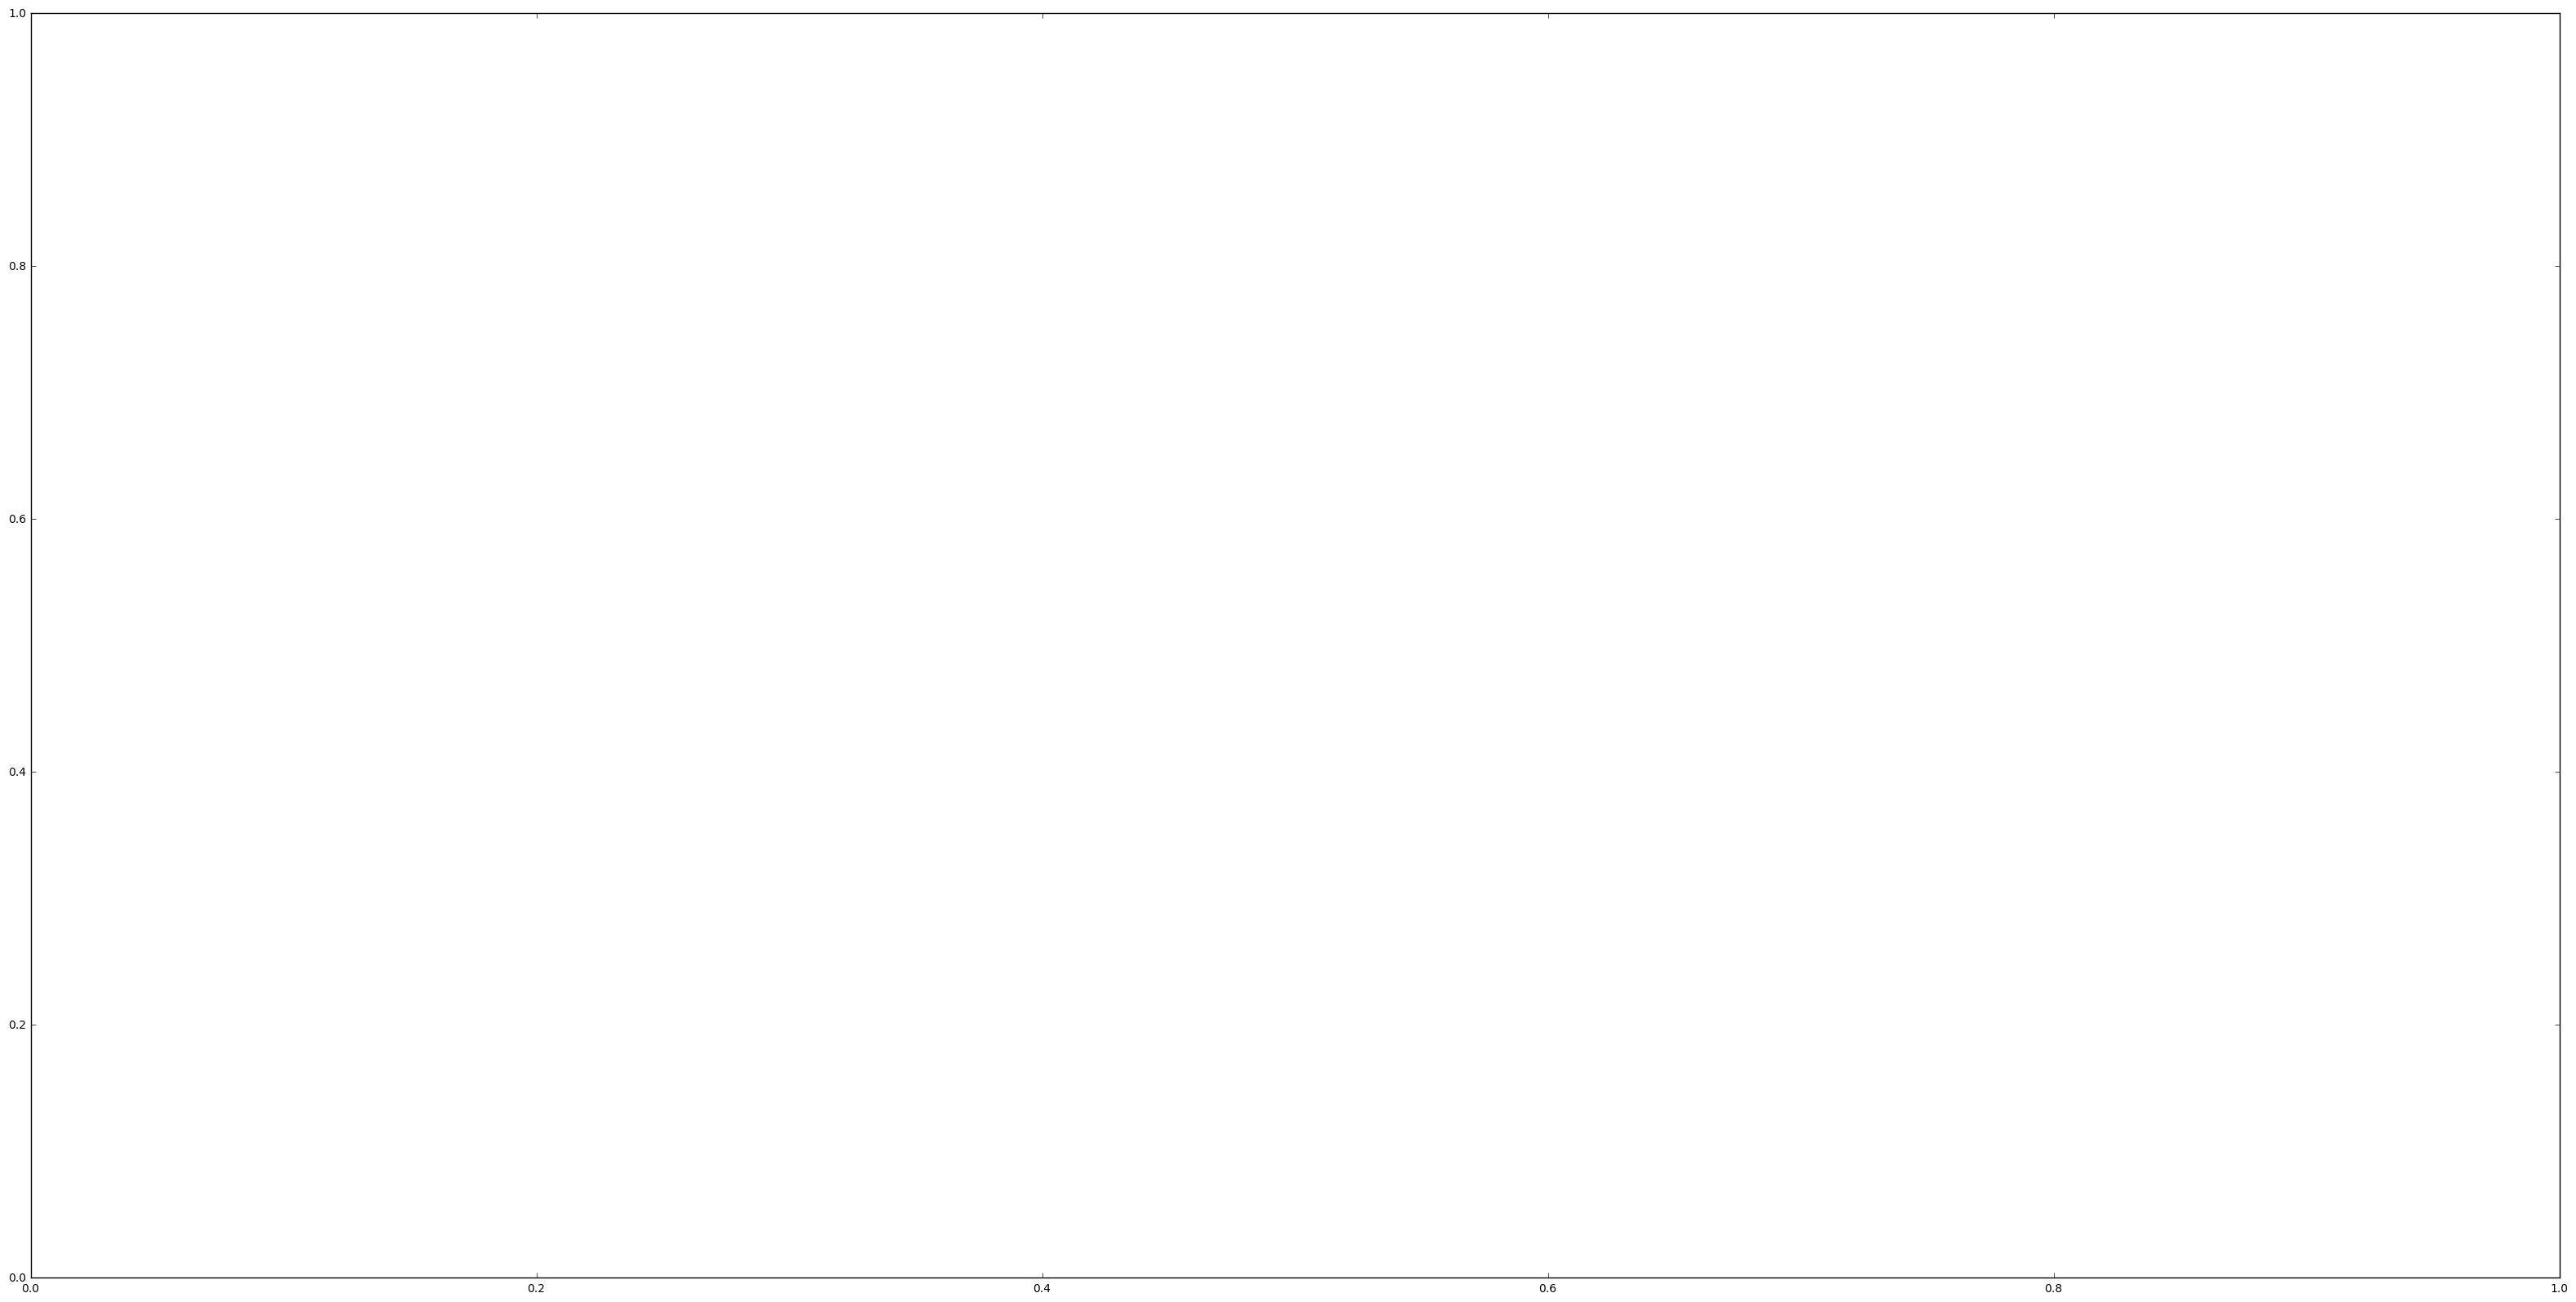

In [2]:
#antibody specificity for GPCRs by heatmap with zscore using HA DAbs
df_heatmap = pd.read_excel('/Users/emilylorenzen/desktop/TagPlay_Zscores.xlsx', sheetname="HA", skiprows = 1)
#df_heatmap = pd.read_excel('/Users/emilylorenzen/desktop/TagPlay_Data2.xlsx', sheetname="1D4Z", skiprows = 508)
GPCR_list = df_heatmap['GPCR'].tolist()
GPCR_set = set(GPCR_list)
df_heatmap.set_index(['RAMP', 'GPCR'], inplace=True)
cols = [col for col in df_heatmap.columns if col[:-3] in GPCR_list or col [:-4] in GPCR_list or col in GPCR_list]
df_heatmap = df_heatmap[cols]
print df_heatmap.head()
#index = [ind for ind in df_heatmap.index]
df_heatmap_median = df_heatmap.groupby(level = ['GPCR']).median()
df_heatmap_median.sort_index(axis = 1, inplace = True)
#df_RAMP.drop(['ADCYAP1R1', 'CALCRL', 'CALCRL.1', 'CALCRL.2', 'VIPR1'], 1, inplace = True)
df_transpose = df_heatmap_median.transpose()
df_transpose.to_csv('GPCR Ab evaluation by HA median.csv')
fig, ax = plt.subplots(figsize=(40,20))  
ax = sns.heatmap(df_transpose.drop(['Buffer', ' Buffer'], axis = 1), cmap="viridis", square=True, vmin = 0, vmax = 2)
sns.set(font_scale=1)
cbar = ax.collections[0].colorbar
cbar.ax.set_title('Z-score', fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.ylabel('Antibody against GPCR', fontsize = 30)
plt.xlabel('Transfected GPCR', fontsize = 30)
plt.tight_layout()
plt.savefig('GPCR Antibody Z score HA mean.pdf', transparent = True)


#print df_heatmap_median

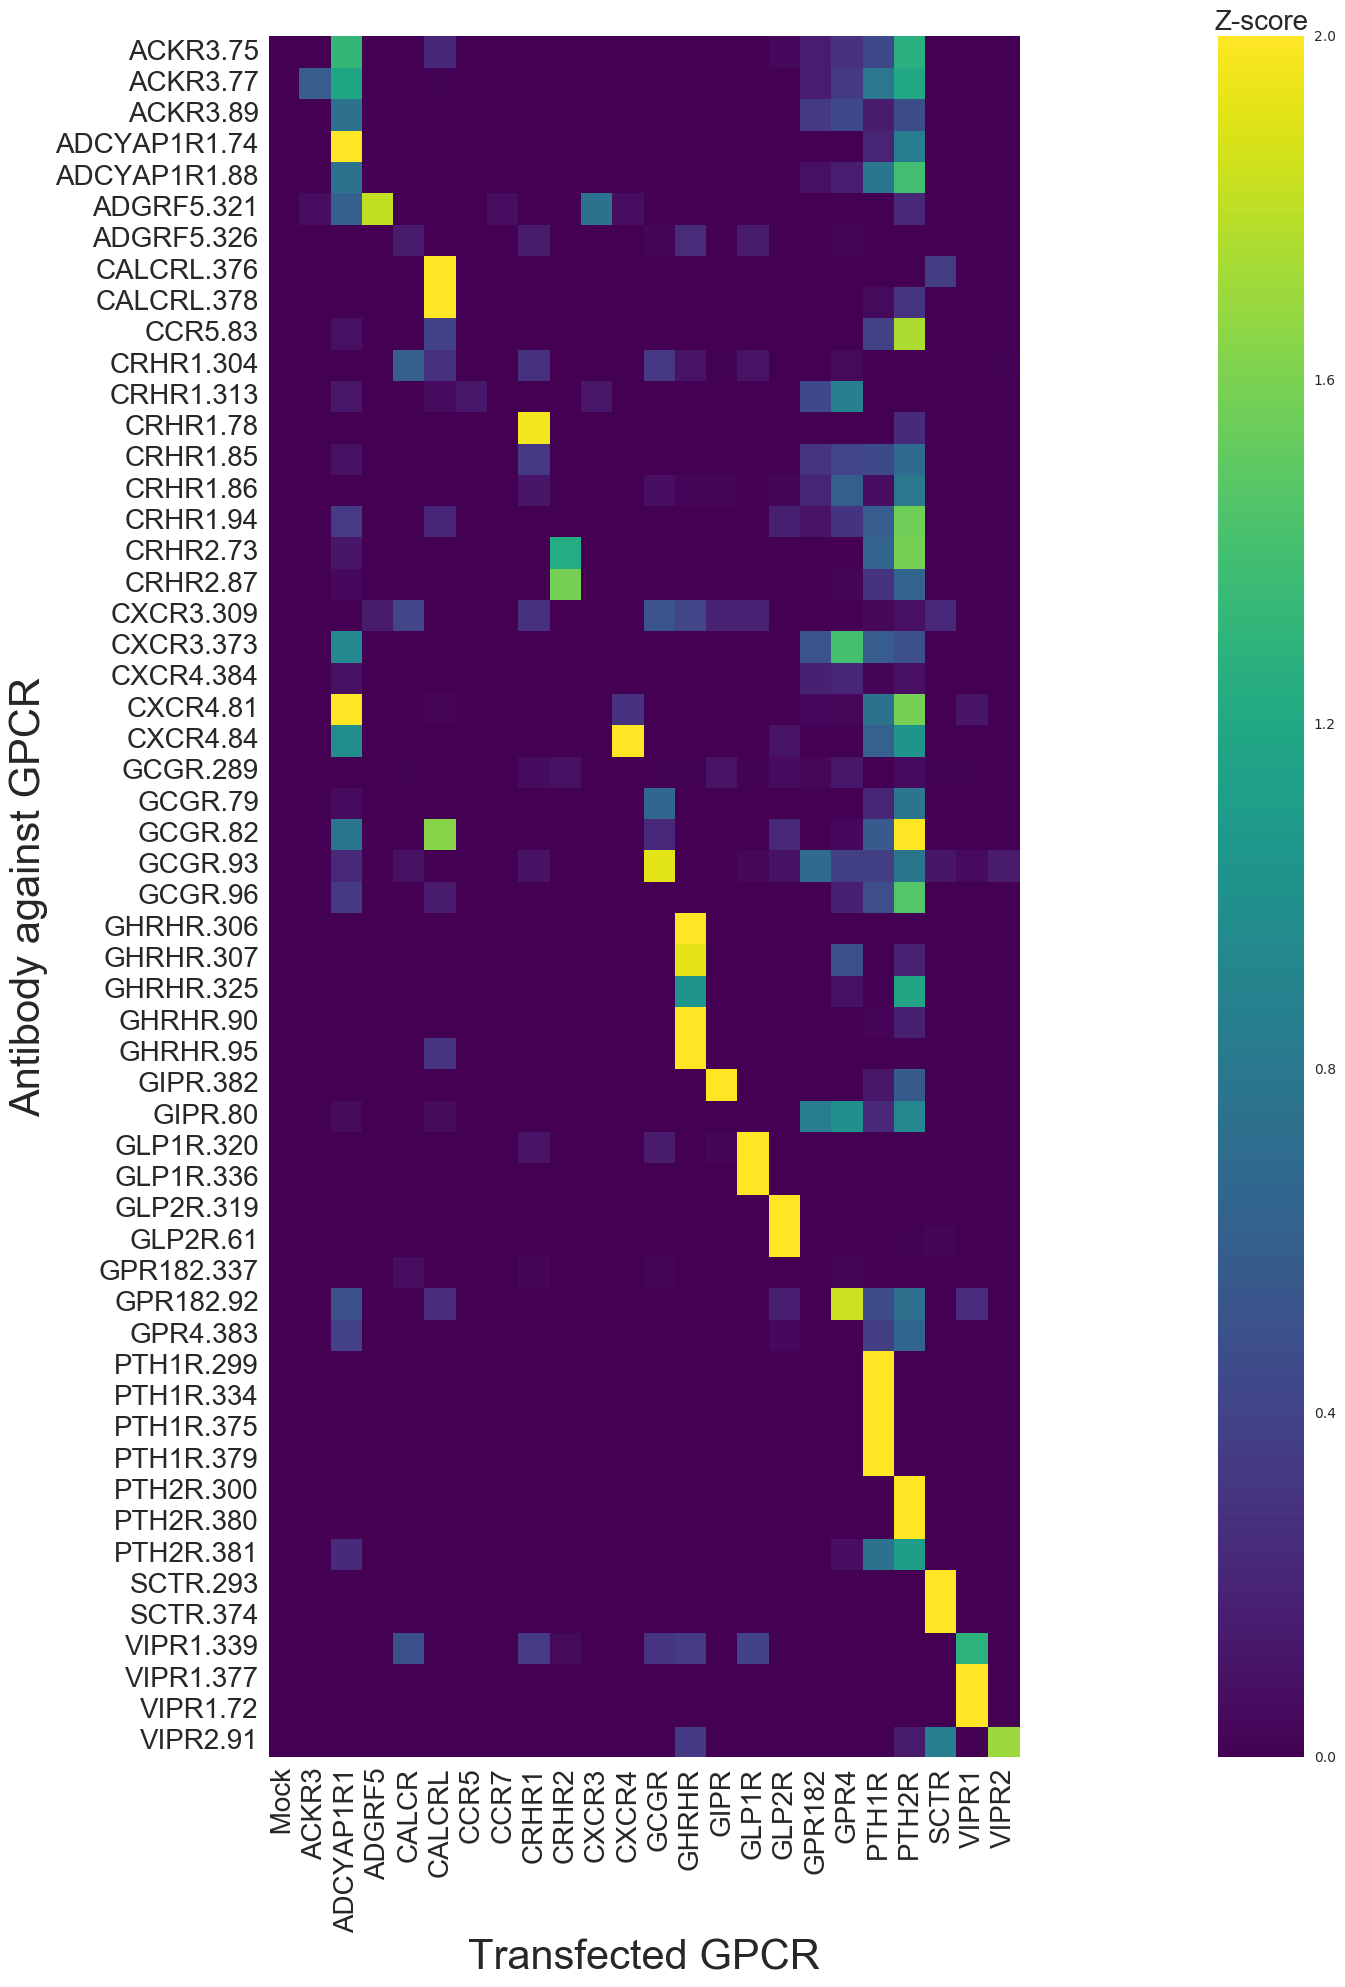

In [6]:
#antibody specificity for GPCRs by heatmap with zscore using 1D4 DAbs
df_heatmap = pd.read_excel('/Users/emilylorenzen/desktop/TagPlay_Zscores.xlsx', sheetname="1D4", skiprows = 1)
#df_heatmap = pd.read_excel('/Users/emilylorenzen/desktop/TagPlay_Data2.xlsx', sheetname="1D4Z", skiprows = 508)
GPCR_list = df_heatmap['GPCR'].tolist()
GPCR_set = set(GPCR_list)
df_heatmap.set_index(['RAMP', 'GPCR'], inplace=True)
cols = [col for col in df_heatmap.columns if col[:-3] in GPCR_list or col [:-4] in GPCR_list or col in GPCR_list]
df_heatmap = df_heatmap[cols]
#index = [ind for ind in df_heatmap.index]
df_heatmap_median = df_heatmap.groupby(level = ['GPCR']).median()
df_heatmap_median.sort_index(axis = 1, inplace = True)
#df_RAMP.drop(['ADCYAP1R1', 'CALCRL', 'CALCRL.1', 'CALCRL.2', 'VIPR1'], 1, inplace = True)
df_transpose = df_heatmap_median.transpose()
df_transpose.to_csv('GPCR Ab evalution by 1D4 median.csv')
fig, ax = plt.subplots(figsize=(40,20))  
ax = sns.heatmap(df_transpose.drop(['Buffer'], axis = 1), cmap="viridis", square=True, vmin = 0, vmax = 2)
sns.set(font_scale=1)
cbar = ax.collections[0].colorbar
cbar.ax.set_title('Z-score', fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.ylabel('Antibody against GPCR', fontsize = 30)
plt.xlabel('Transfected GPCR', fontsize = 30)
plt.tight_layout()
plt.savefig('GPCR Antibody Z score 1D4 mean.pdf', transparent = True)


#print df_heatmap_median

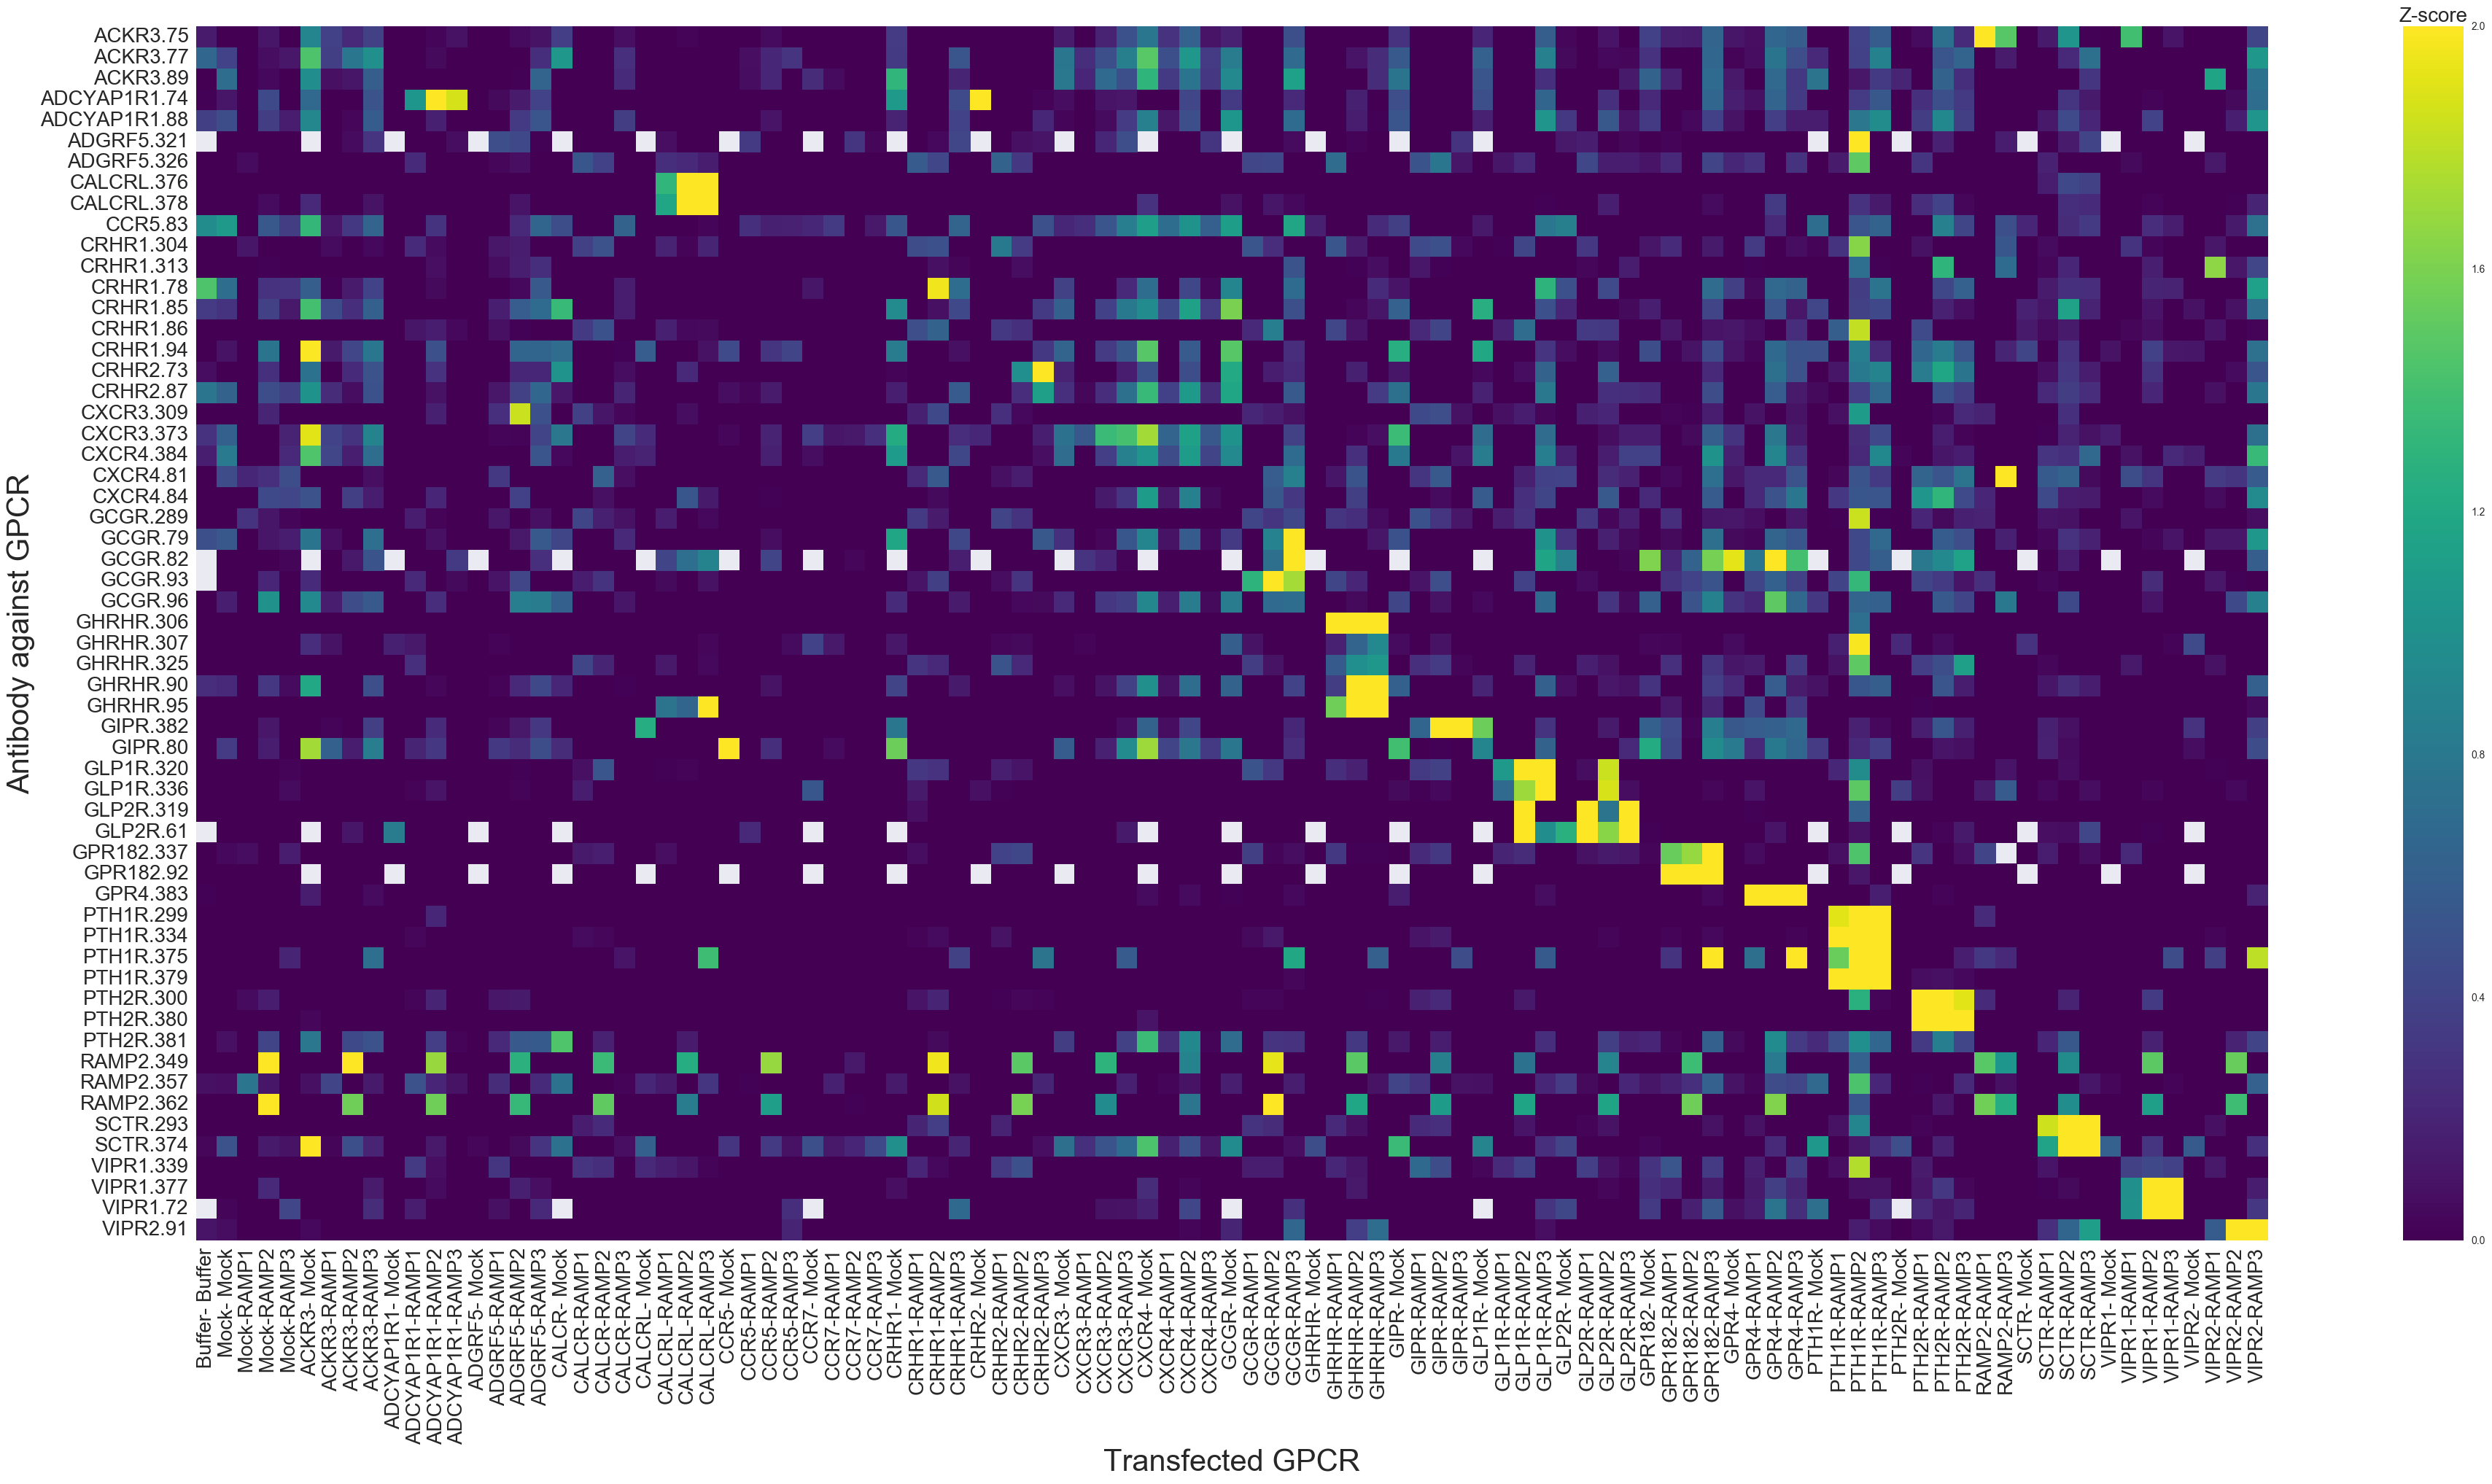

In [33]:
#RAMP interaction with GPCRs, using GPCR Ab and FLAG detection 
df_heatmap = pd.read_excel('/Users/emilylorenzen/desktop/TagPlay_Zscores.xlsx', sheetname="FLAG", skiprows = 1)
#df_heatmap = pd.read_excel('/Users/emilylorenzen/desktop/TagPlay_Data2.xlsx', sheetname="1D4Z", skiprows = 508)
GPCR_list = df_heatmap['GPCR'].tolist()
GPCR_set = set(GPCR_list)
df_heatmap.set_index(['RAMP', 'GPCR'], inplace=True)
cols = [col for col in df_heatmap.columns if col[:-3] in GPCR_list or col [:-4] in GPCR_list or col in GPCR_list]
df_heatmap = df_heatmap[cols]
#index = [ind for ind in df_heatmap.index]
df_heatmap_median = df_heatmap.groupby(level = ['GPCR', 'RAMP']).mean()
df_heatmap_median.sort_index(axis = 1, inplace = True)
#df_RAMP.drop(['ADCYAP1R1', 'CALCRL', 'CALCRL.1', 'CALCRL.2', 'VIPR1'], 1, inplace = True)
df_transpose = df_heatmap_median.transpose()
#print df_transpose
df_transpose.to_csv('Interaction by GPCR antibody FLAG mean.csv')
fig, ax = plt.subplots(figsize=(40,20))  
ax = sns.heatmap(df_transpose.drop(['Buffer'], axis = 1), cmap="viridis", square=True, vmin = 0, vmax = 2)
sns.set(font_scale=1)
cbar = ax.collections[0].colorbar
cbar.ax.set_title('Z-score', fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.ylabel('Antibody against GPCR', fontsize = 30)
plt.xlabel('Transfected GPCR', fontsize = 30)
plt.tight_layout()
plt.savefig('GPCR Antibody Z score 1D4 mean.pdf', transparent = True)


#print df_heatmap_median

/Users/emilylorenzen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


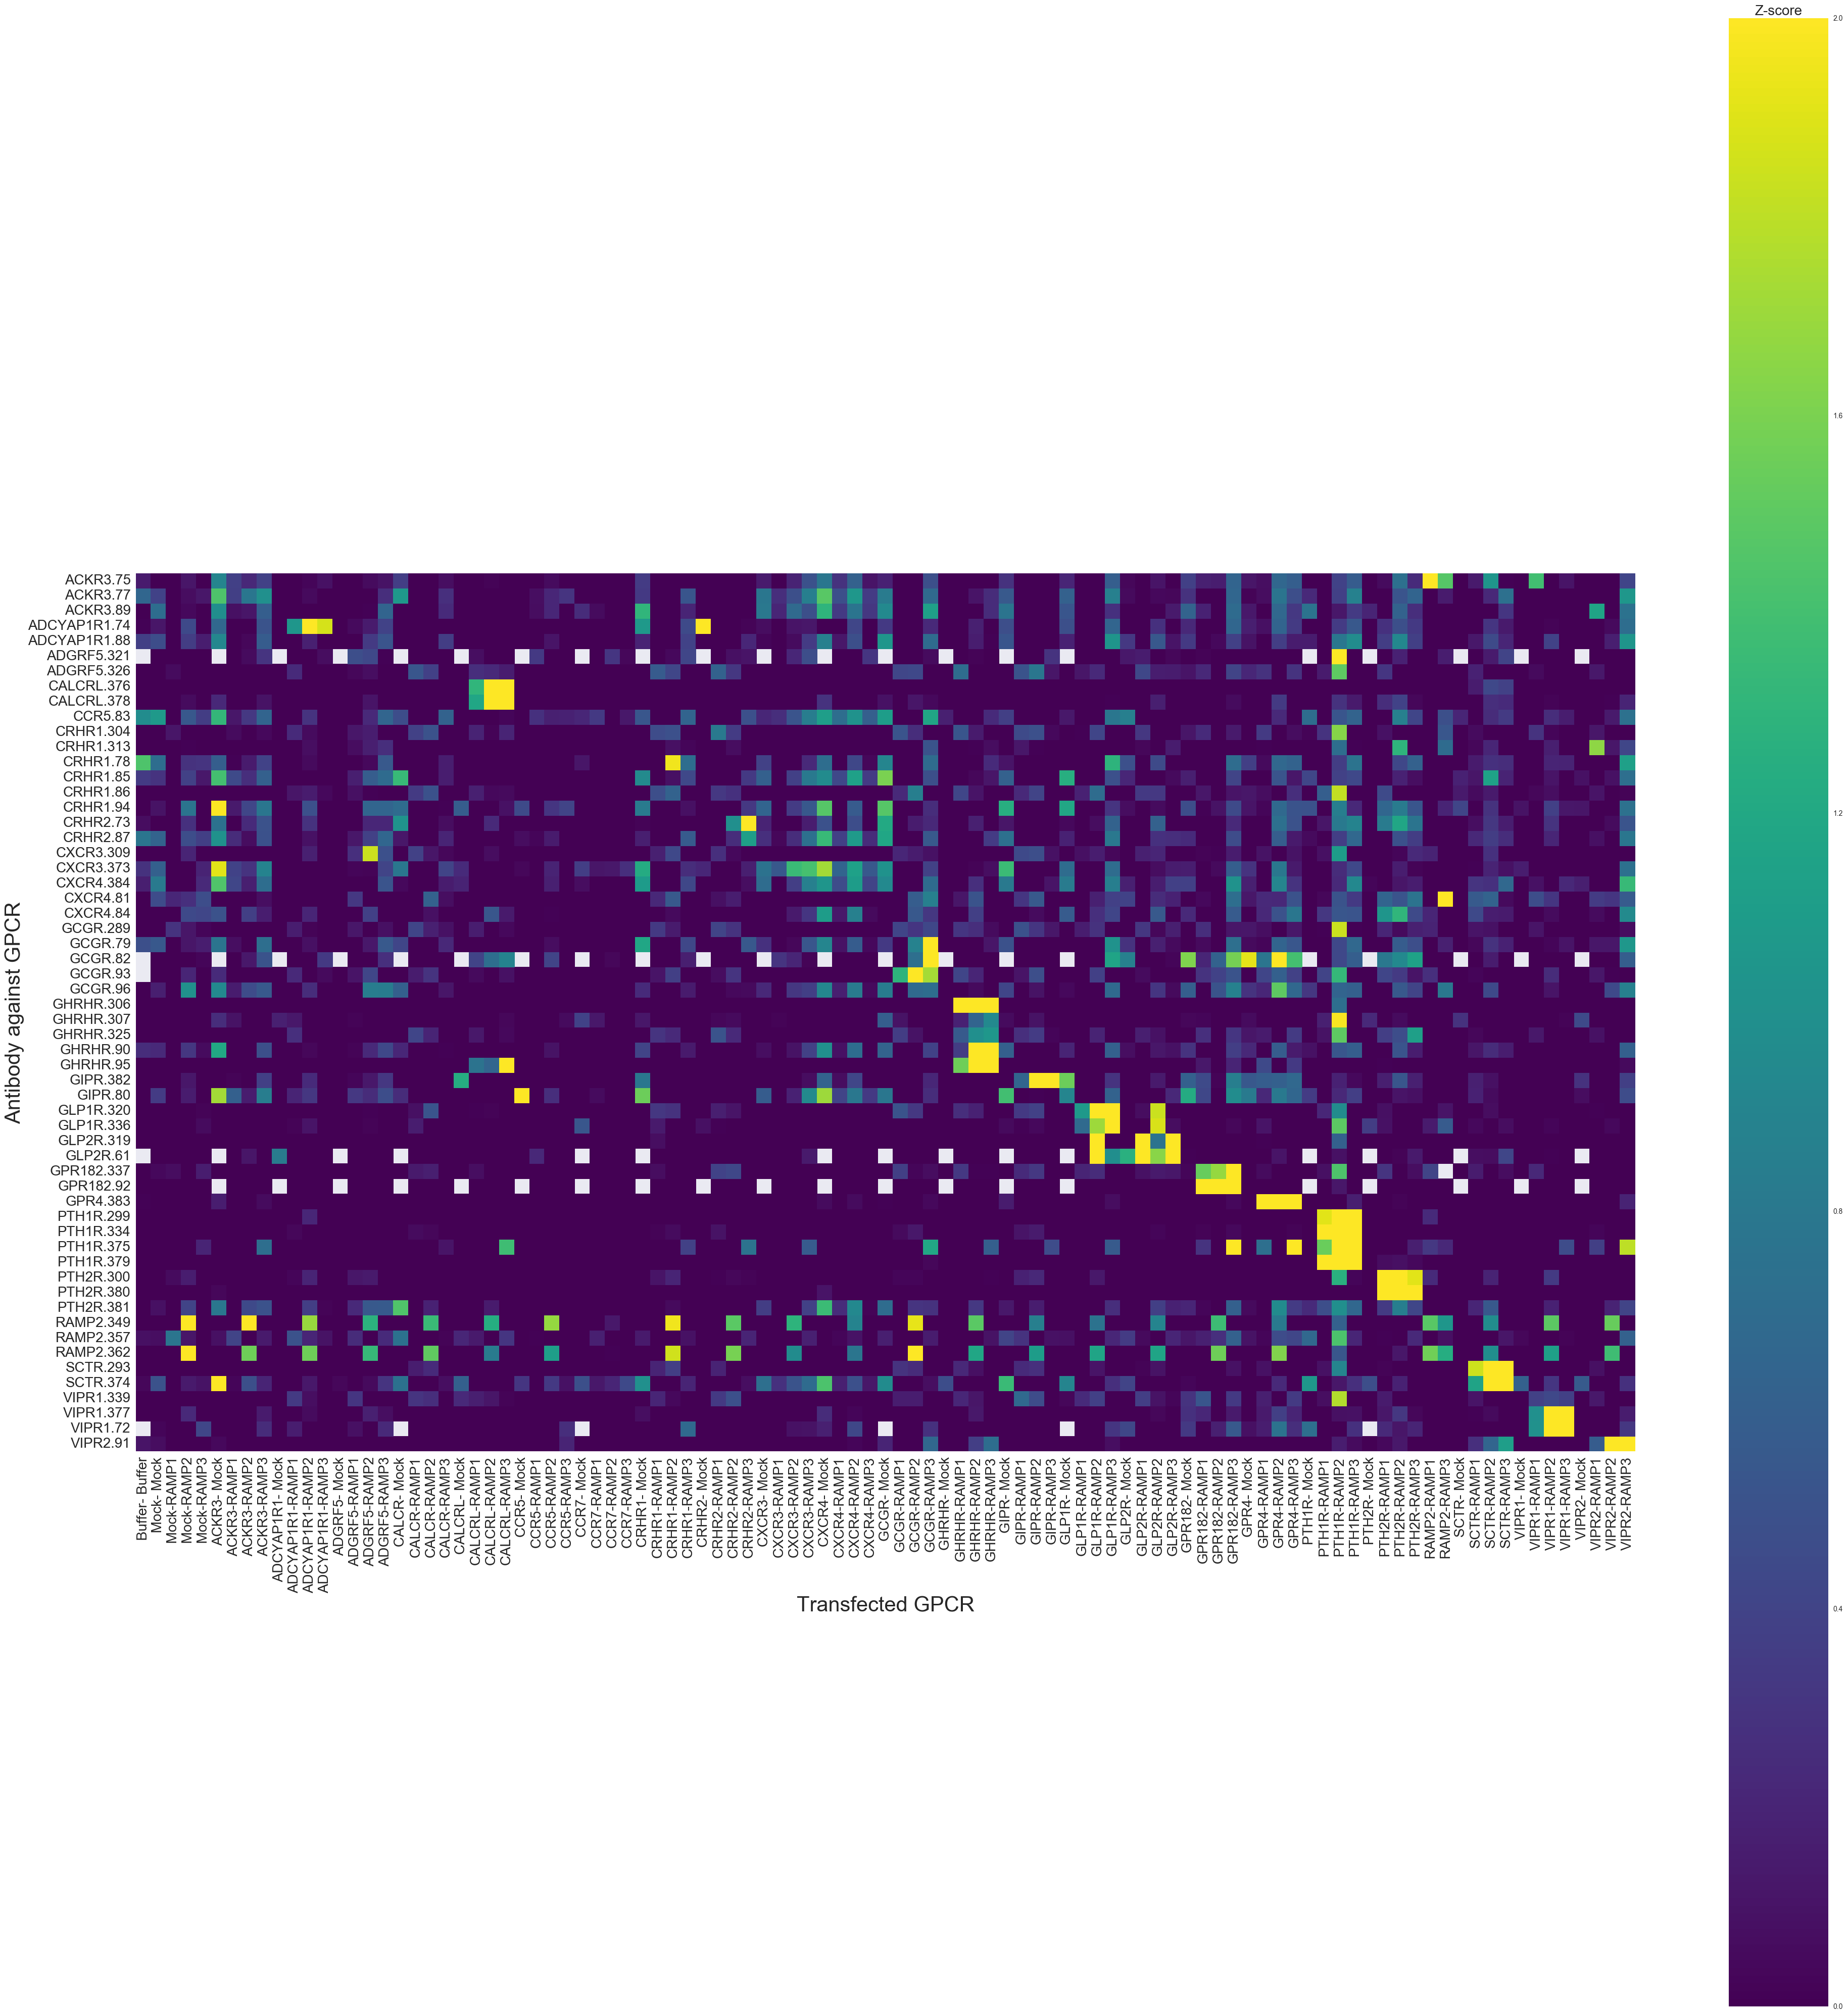

In [7]:
#RAMP interaction with GPCRs, using GPCR Ab and FLAG detection 
df_heatmap = pd.read_excel('/Users/emilylorenzen/desktop/TagPlay_Zscores.xlsx', sheetname="FLAG", skiprows = 1)
#df_heatmap = pd.read_excel('/Users/emilylorenzen/desktop/TagPlay_Data2.xlsx', sheetname="1D4Z", skiprows = 508)
GPCR_list = df_heatmap['GPCR'].tolist()
GPCR_set = set(GPCR_list)
df_heatmap.set_index(['RAMP', 'GPCR'], inplace=True)
cols = [col for col in df_heatmap.columns if col[:-3] in GPCR_list or col [:-4] in GPCR_list or col in GPCR_list]
df_heatmap = df_heatmap[cols]
#index = [ind for ind in df_heatmap.index]
df_heatmap_median = df_heatmap.groupby(level = ['GPCR', 'RAMP']).mean()
df_heatmap_median.sort_index(axis = 1, inplace = True)
#df_RAMP.drop(['ADCYAP1R1', 'CALCRL', 'CALCRL.1', 'CALCRL.2', 'VIPR1'], 1, inplace = True)
df_transpose = df_heatmap_median.transpose()
#print df_transpose
df_transpose.to_csv('Interaction by GPCR antibody FLAG mean.csv')
fig, ax = plt.subplots(figsize=(40,40))  
ax = sns.heatmap(df_transpose.drop(['Buffer'], axis = 1), cmap="viridis", square=True, vmin = 0, vmax = 2)
sns.set(font_scale=1)
cbar = ax.collections[0].colorbar
cbar.ax.set_title('Z-score', fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.ylabel('Antibody against GPCR', fontsize = 30)
plt.xlabel('Transfected GPCR', fontsize = 30)
plt.tight_layout()
plt.savefig('GPCR Antibody Z score 1D4 mean.pdf', transparent = True)


#print df_heatmap_median

In [ ]:
#RAMP interaction with GPCRs, using GPCR Ab and FLAG detection 
df_heatmap = pd.read_excel('/Users/emilylorenzen/desktop/TagPlay_Zscores.xlsx', sheetname="FLAG", skiprows = 1)
#df_heatmap = pd.read_excel('/Users/emilylorenzen/desktop/TagPlay_Data2.xlsx', sheetname="1D4Z", skiprows = 508)
RMP_list = df_heatmap['GPCR'].tolist()
GPCR_set = set(GPCR_list)
df_heatmap.set_index(['RAMP', 'GPCR'], inplace=True)
cols = [col for col in df_heatmap.columns if col[:-3] in GPCR_list or col [:-4] in GPCR_list or col in GPCR_list]
df_heatmap = df_heatmap[cols]
#index = [ind for ind in df_heatmap.index]
df_heatmap_median = df_heatmap.groupby(level = ['GPCR', 'RAMP']).mean()
df_heatmap_median.sort_index(axis = 1, inplace = True)
#df_RAMP.drop(['ADCYAP1R1', 'CALCRL', 'CALCRL.1', 'CALCRL.2', 'VIPR1'], 1, inplace = True)
df_transpose = df_heatmap_median.transpose()
#print df_transpose
df_transpose.to_csv('Interaction by GPCR antibody FLAG mean.csv')
fig, ax = plt.subplots(figsize=(40,40))  
ax = sns.heatmap(df_transpose.drop(['Buffer'], axis = 1), cmap="viridis", square=True, vmin = 0, vmax = 2)
sns.set(font_scale=1)
cbar = ax.collections[0].colorbar
cbar.ax.set_title('Z-score', fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.ylabel('Antibody against GPCR', fontsize = 30)
plt.xlabel('Transfected GPCR', fontsize = 30)
plt.tight_layout()
plt.savefig('GPCR Antibody Z score 1D4 mean.pdf', transparent = True)

In [170]:
df_heatmap_median = df_heatmap.groupby(level = ['GPCR', 'RAMP'])
print df_heatmap_median

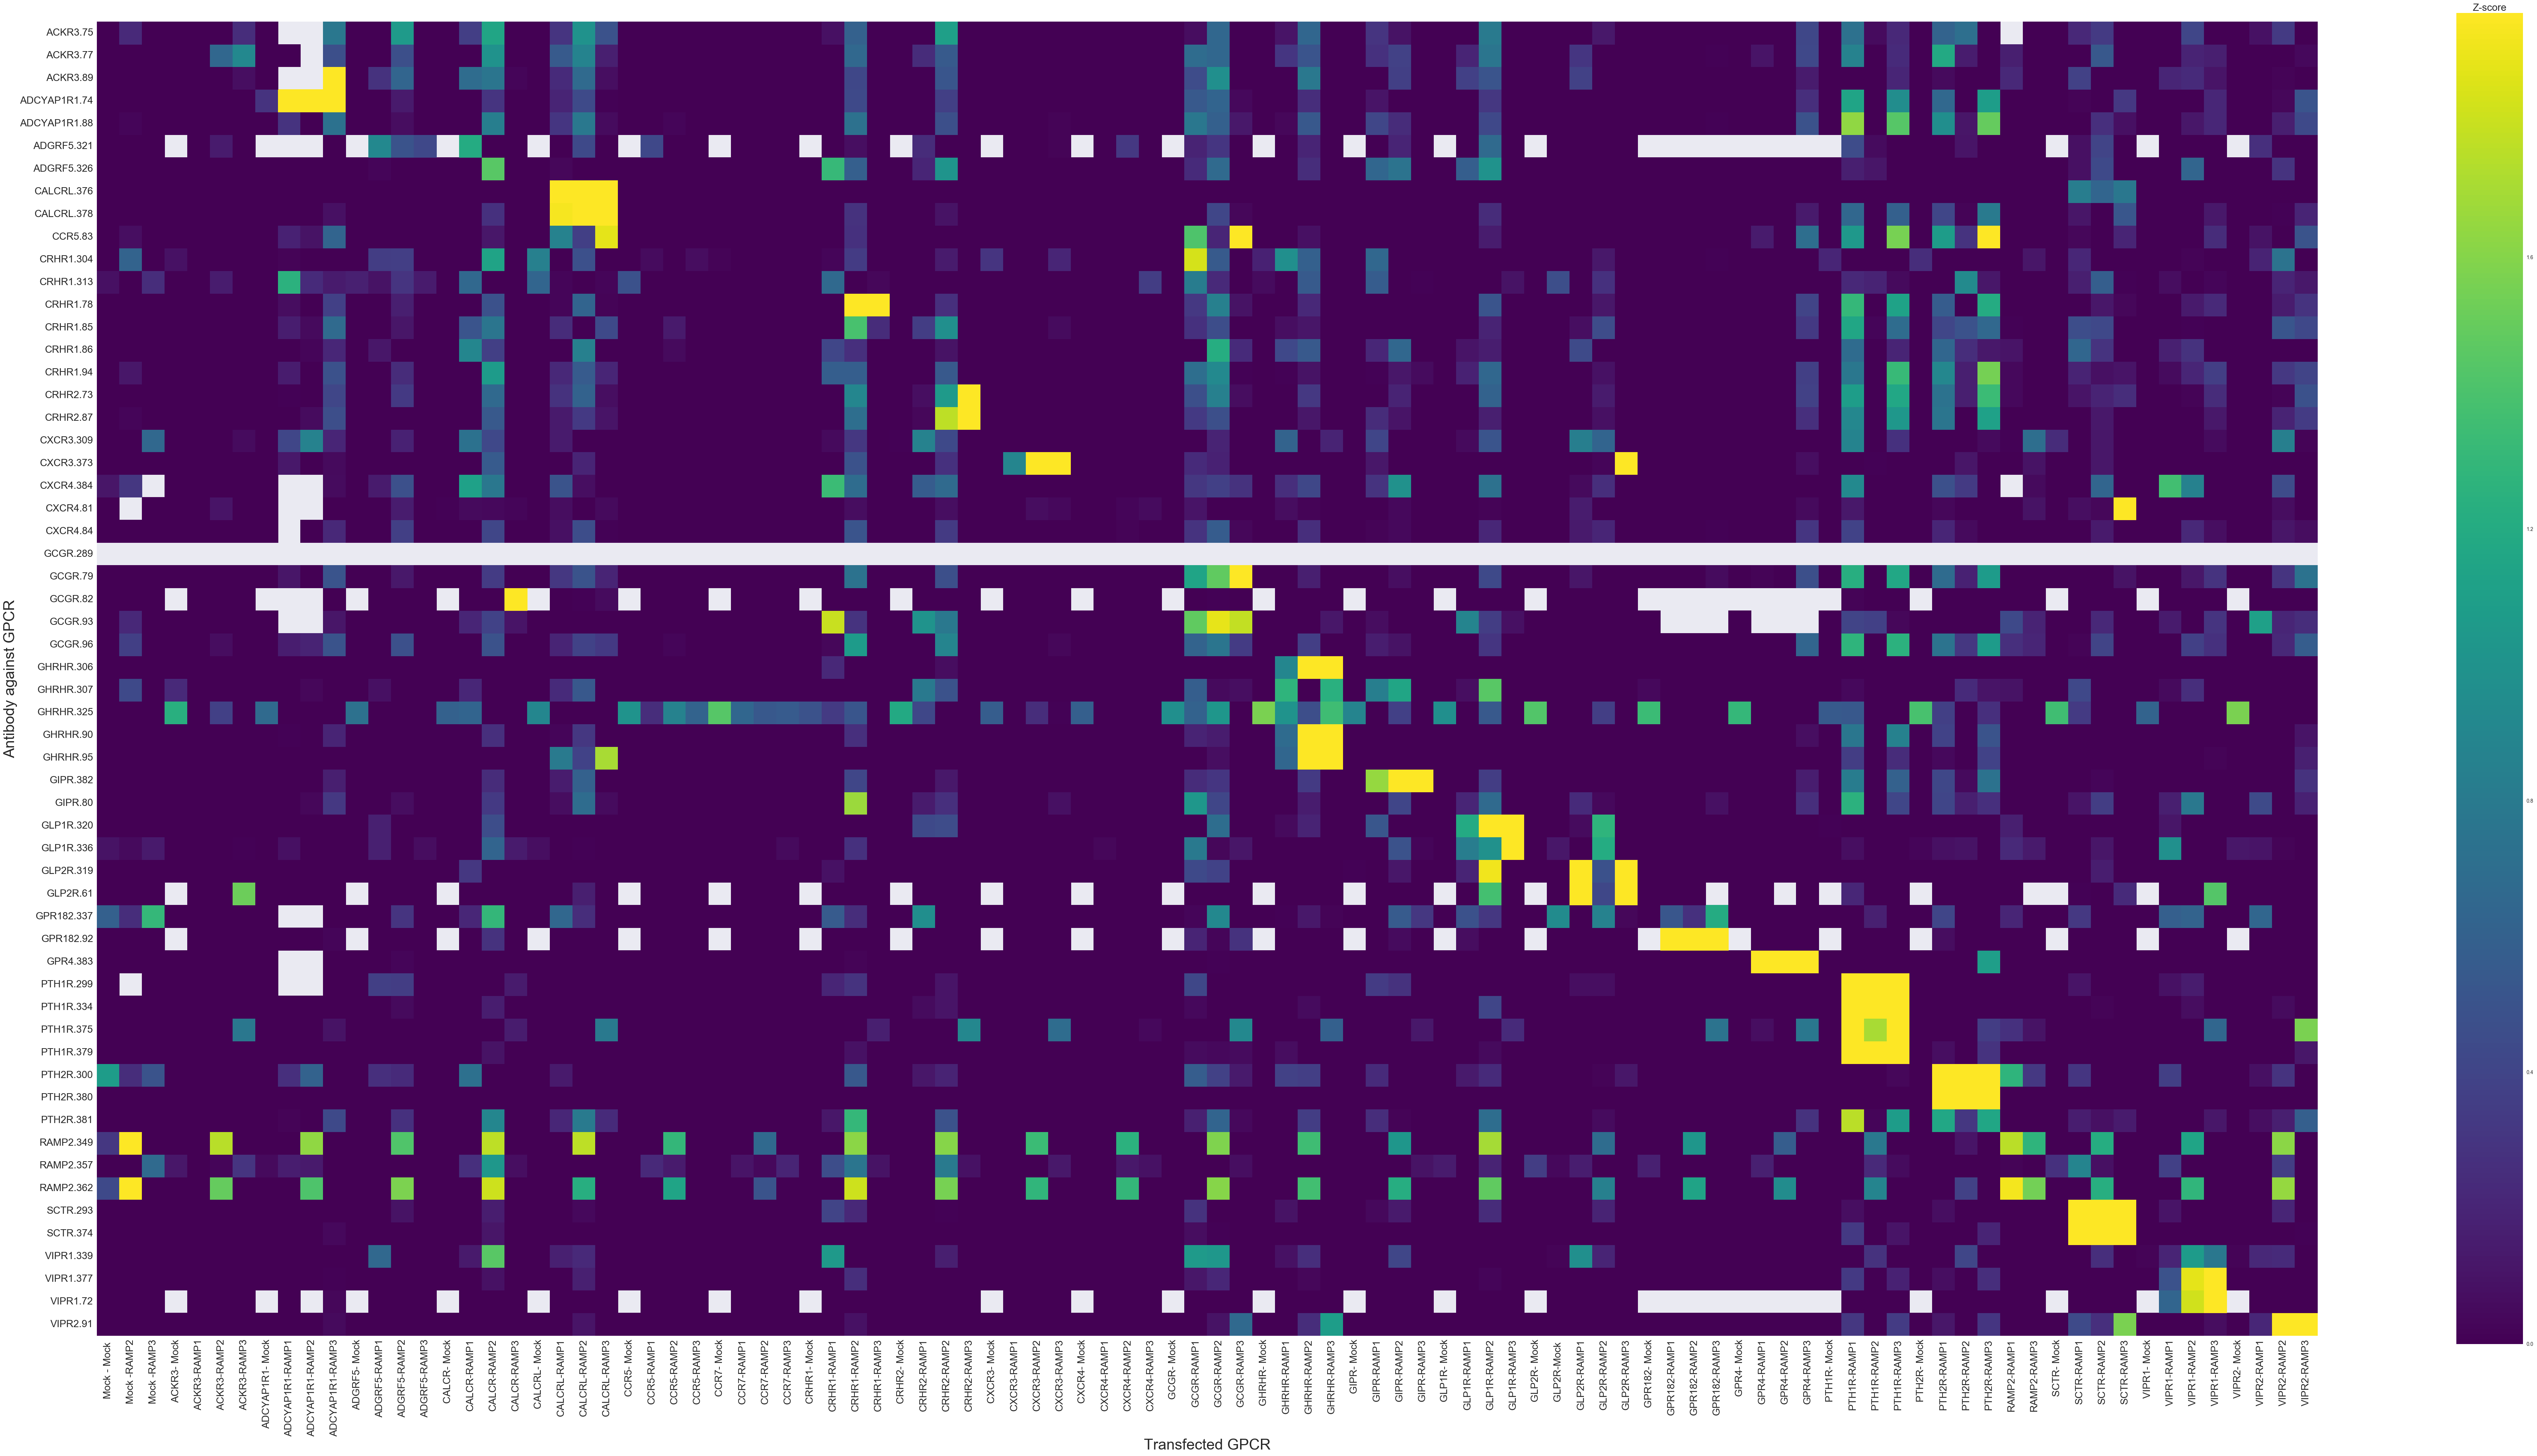

In [9]:
#GPCR interaction with RAMPs using GPCR DABs and OLLAS detection
df_heatmap = pd.read_excel('/Users/emilylorenzen/desktop/TagPlay_Zscores.xlsx', sheetname="OLLAS", skiprows = 1)
#df_heatmap = pd.read_excel('/Users/emilylorenzen/desktop/TagPlay_Data2.xlsx', sheetname="1D4Z", skiprows = 508)
GPCR_list = df_heatmap['GPCR'].tolist()
df_heatmap.set_index(['RAMP', 'GPCR'], inplace=True)
cols = [col for col in df_heatmap.columns if col[:-3] in GPCR_list or col [:-4] in GPCR_list or col in GPCR_list]
df_heatmap = df_heatmap[cols]
df_heatmap.drop(' Mock', level = 'GPCR', inplace = True)
index = [ind for ind in df_heatmap.index]
df_heatmap_median = df_heatmap.groupby(level = ['GPCR', 'RAMP']).mean()

df_heatmap_median.sort_index(axis = 1, inplace = True)
#df_RAMP.drop(['ADCYAP1R1', 'CALCRL', 'CALCRL.1', 'CALCRL.2', 'VIPR1'], 1, inplace = True)
df_transpose = df_heatmap_median.transpose()
#print df_transpose
df_transpose.to_csv('Interaction by GPCR antibody OLLAS mean.csv')
fig, ax = plt.subplots(figsize=(80,40))  
ax = sns.heatmap(df_transpose.drop(['Buffer'], axis = 1), cmap="viridis", square=True, vmin = 0, vmax = 1.96)
sns.set(font_scale=1)
cbar = ax.collections[0].colorbar
cbar.ax.set_title('Z-score', fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.ylabel('Antibody against GPCR', fontsize = 30)
plt.xlabel('Transfected GPCR', fontsize = 30)
plt.tight_layout()
#plt.savefig('Interaction by GPCR antibody OLLAS median.pdf', transparent = True)

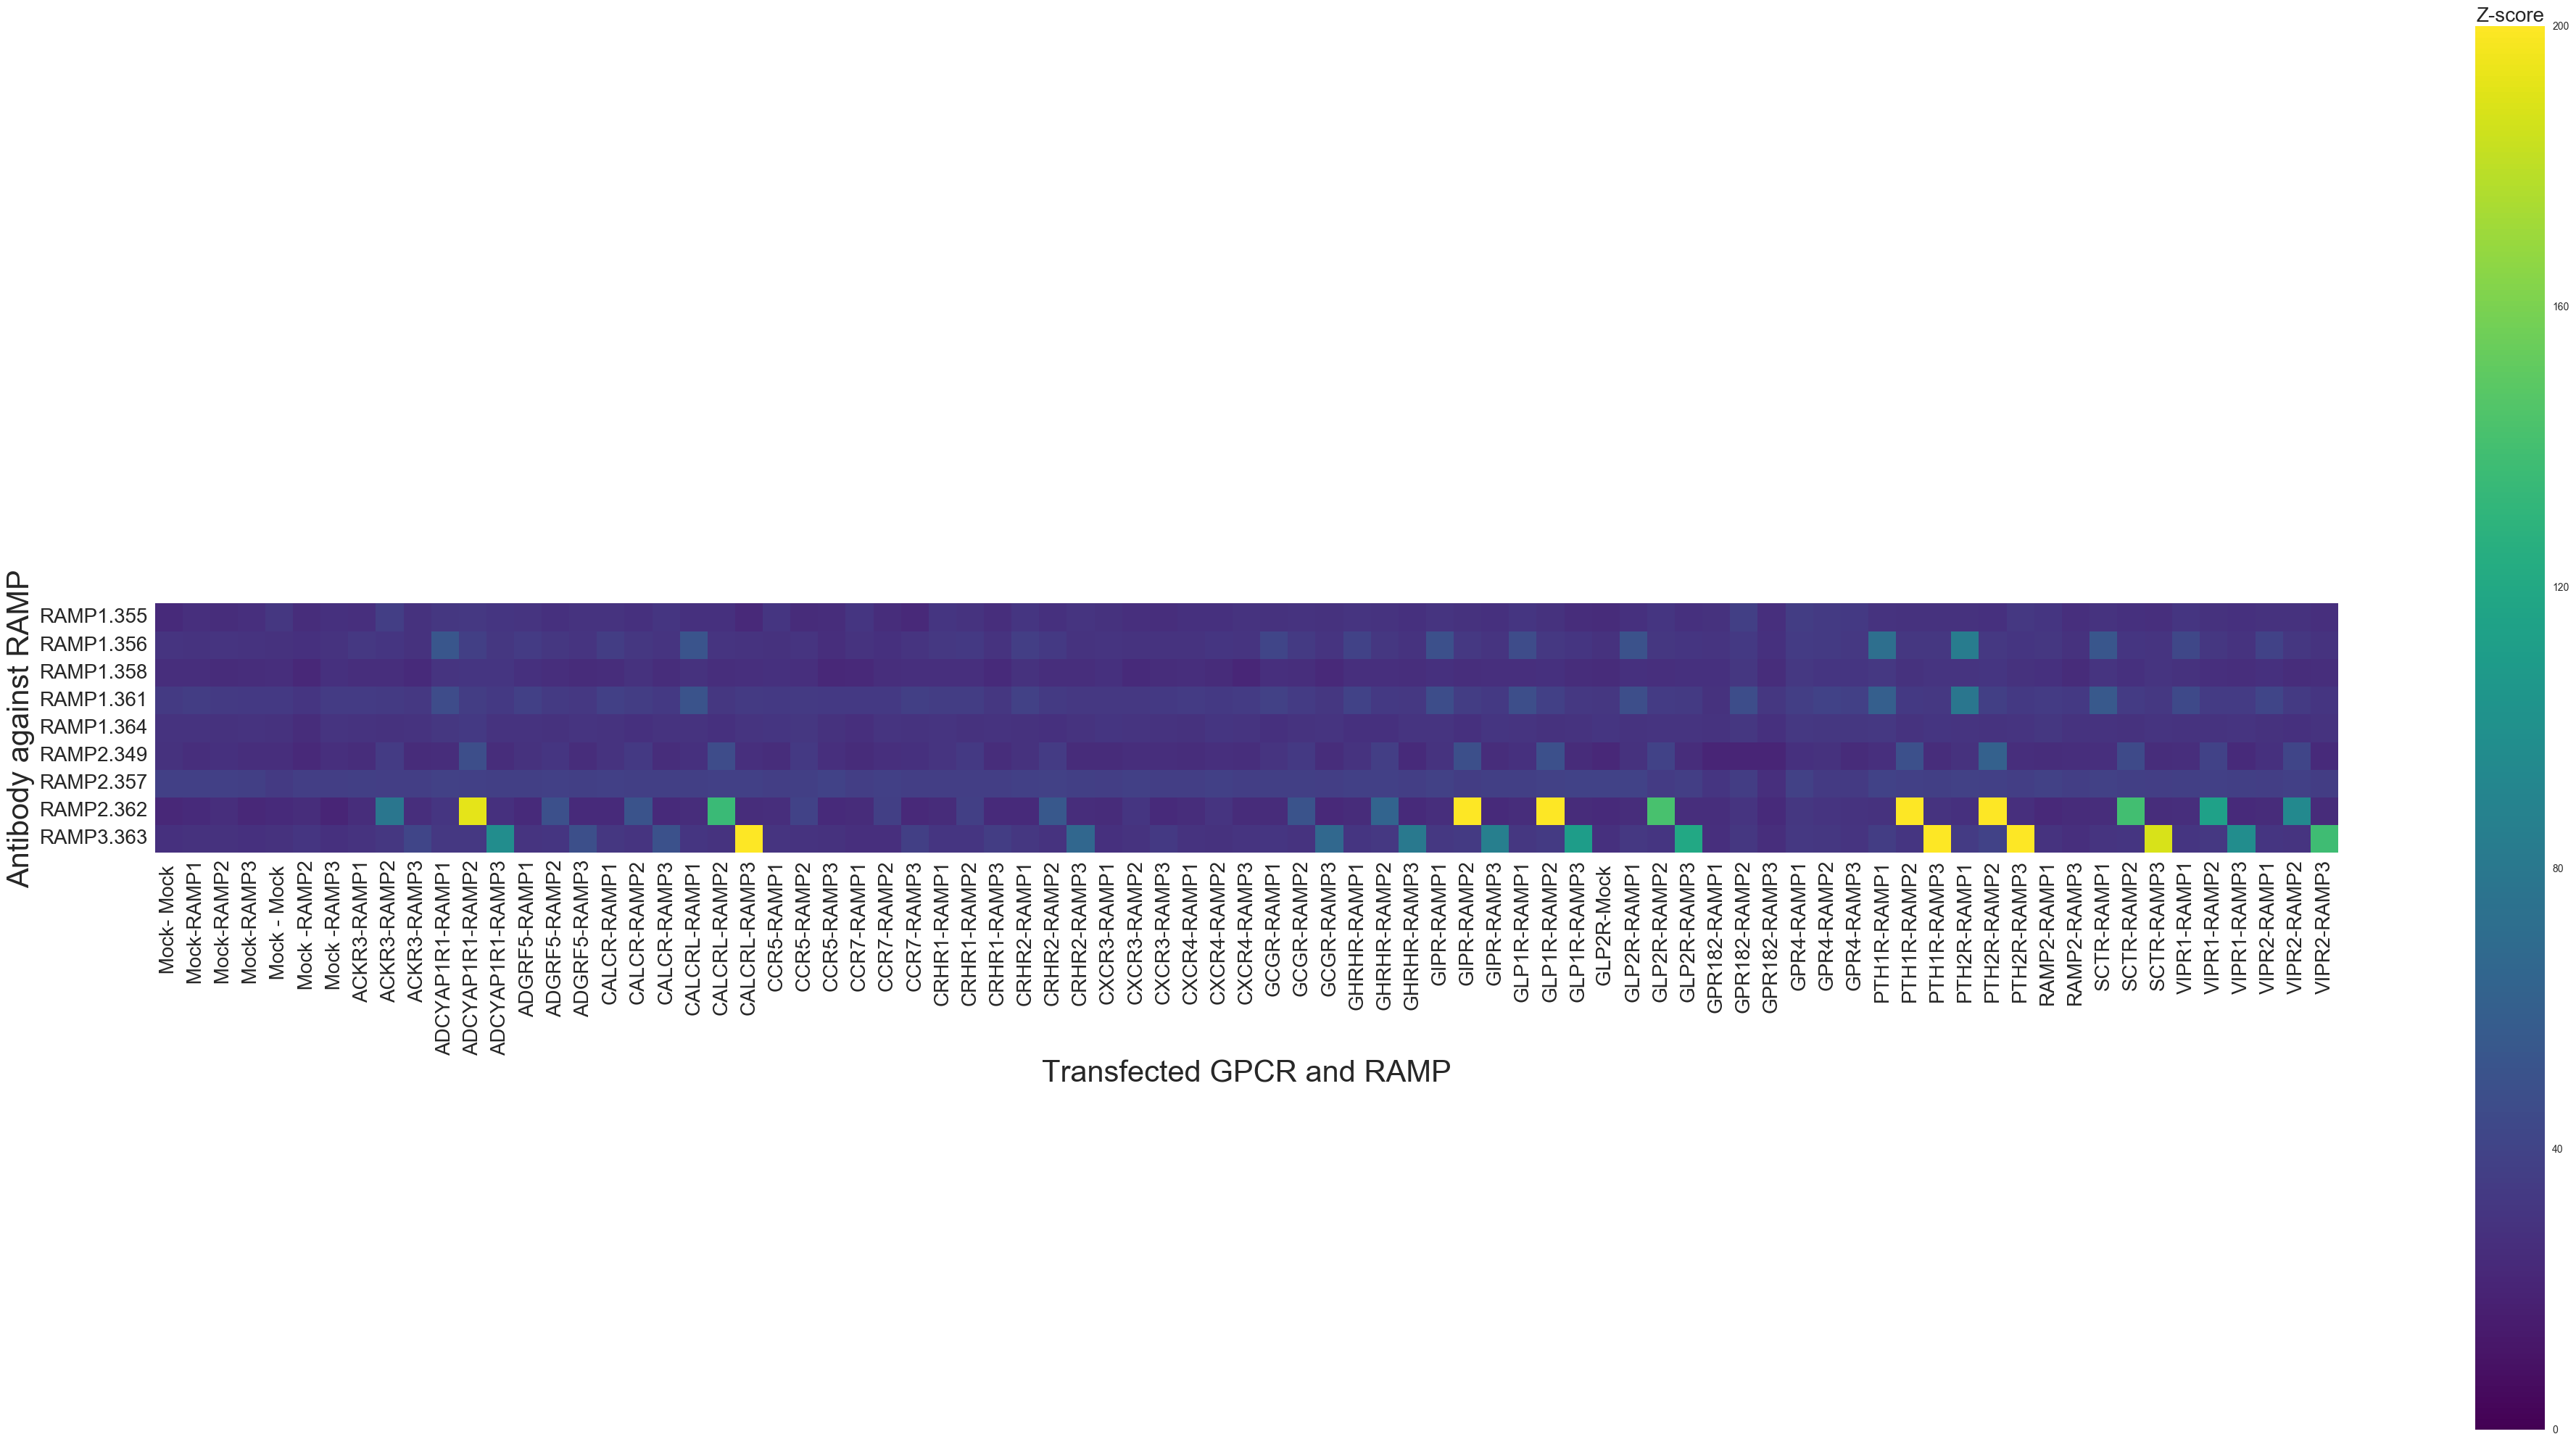

In [7]:
#RAMP interaction with GPCRs using RAMP Abs, and HA detection
df_heatmap = pd.read_excel('/Users/emilylorenzen/desktop/TagPlay_Data_Complete_FInal2.xlsx', sheetname="1D4", skiprows = 1)
#df_heatmap = pd.read_excel('/Users/emilylorenzen/desktop/TagPlay_Data2.xlsx', sheetname="1D4Z", skiprows = 508)
RAMP_list = df_heatmap['RAMP'].tolist()
df_heatmap.set_index(['RAMP', 'GPCR'], inplace=True)
cols = [col for col in df_heatmap.columns if col[:-3] in RAMP_list or col [:-4] in RAMP_list or col in RAMP_list]
df_heatmap = df_heatmap[cols]
df_heatmap.drop(' Mock', level = 'RAMP', inplace = True)
index = [ind for ind in df_heatmap.index]
df_heatmap_median = df_heatmap.groupby(level = ['GPCR', 'RAMP']).mean()

df_heatmap_median.sort_index(axis = 1, inplace = True)
#df_RAMP.drop(['ADCYAP1R1', 'CALCRL', 'CALCRL.1', 'CALCRL.2', 'VIPR1'], 1, inplace = True)
df_transpose = df_heatmap_median.transpose()
#print df_transpose
df_transpose.to_csv('Interaction by RAMP antibody HA mean.csv')
fig, ax = plt.subplots(figsize=(40,20))  
ax = sns.heatmap(df_transpose.drop(['Buffer'], axis = 1), cmap="viridis", square=True, vmin = 0, vmax = 200)
sns.set(font_scale=1)
cbar = ax.collections[0].colorbar
cbar.ax.set_title('Z-score', fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.ylabel('Antibody against RAMP', fontsize = 30)
plt.xlabel('Transfected GPCR and RAMP', fontsize = 30)
plt.tight_layout()
plt.savefig('Interaction by RAMP antibody HA mean.pdf', transparent = True)

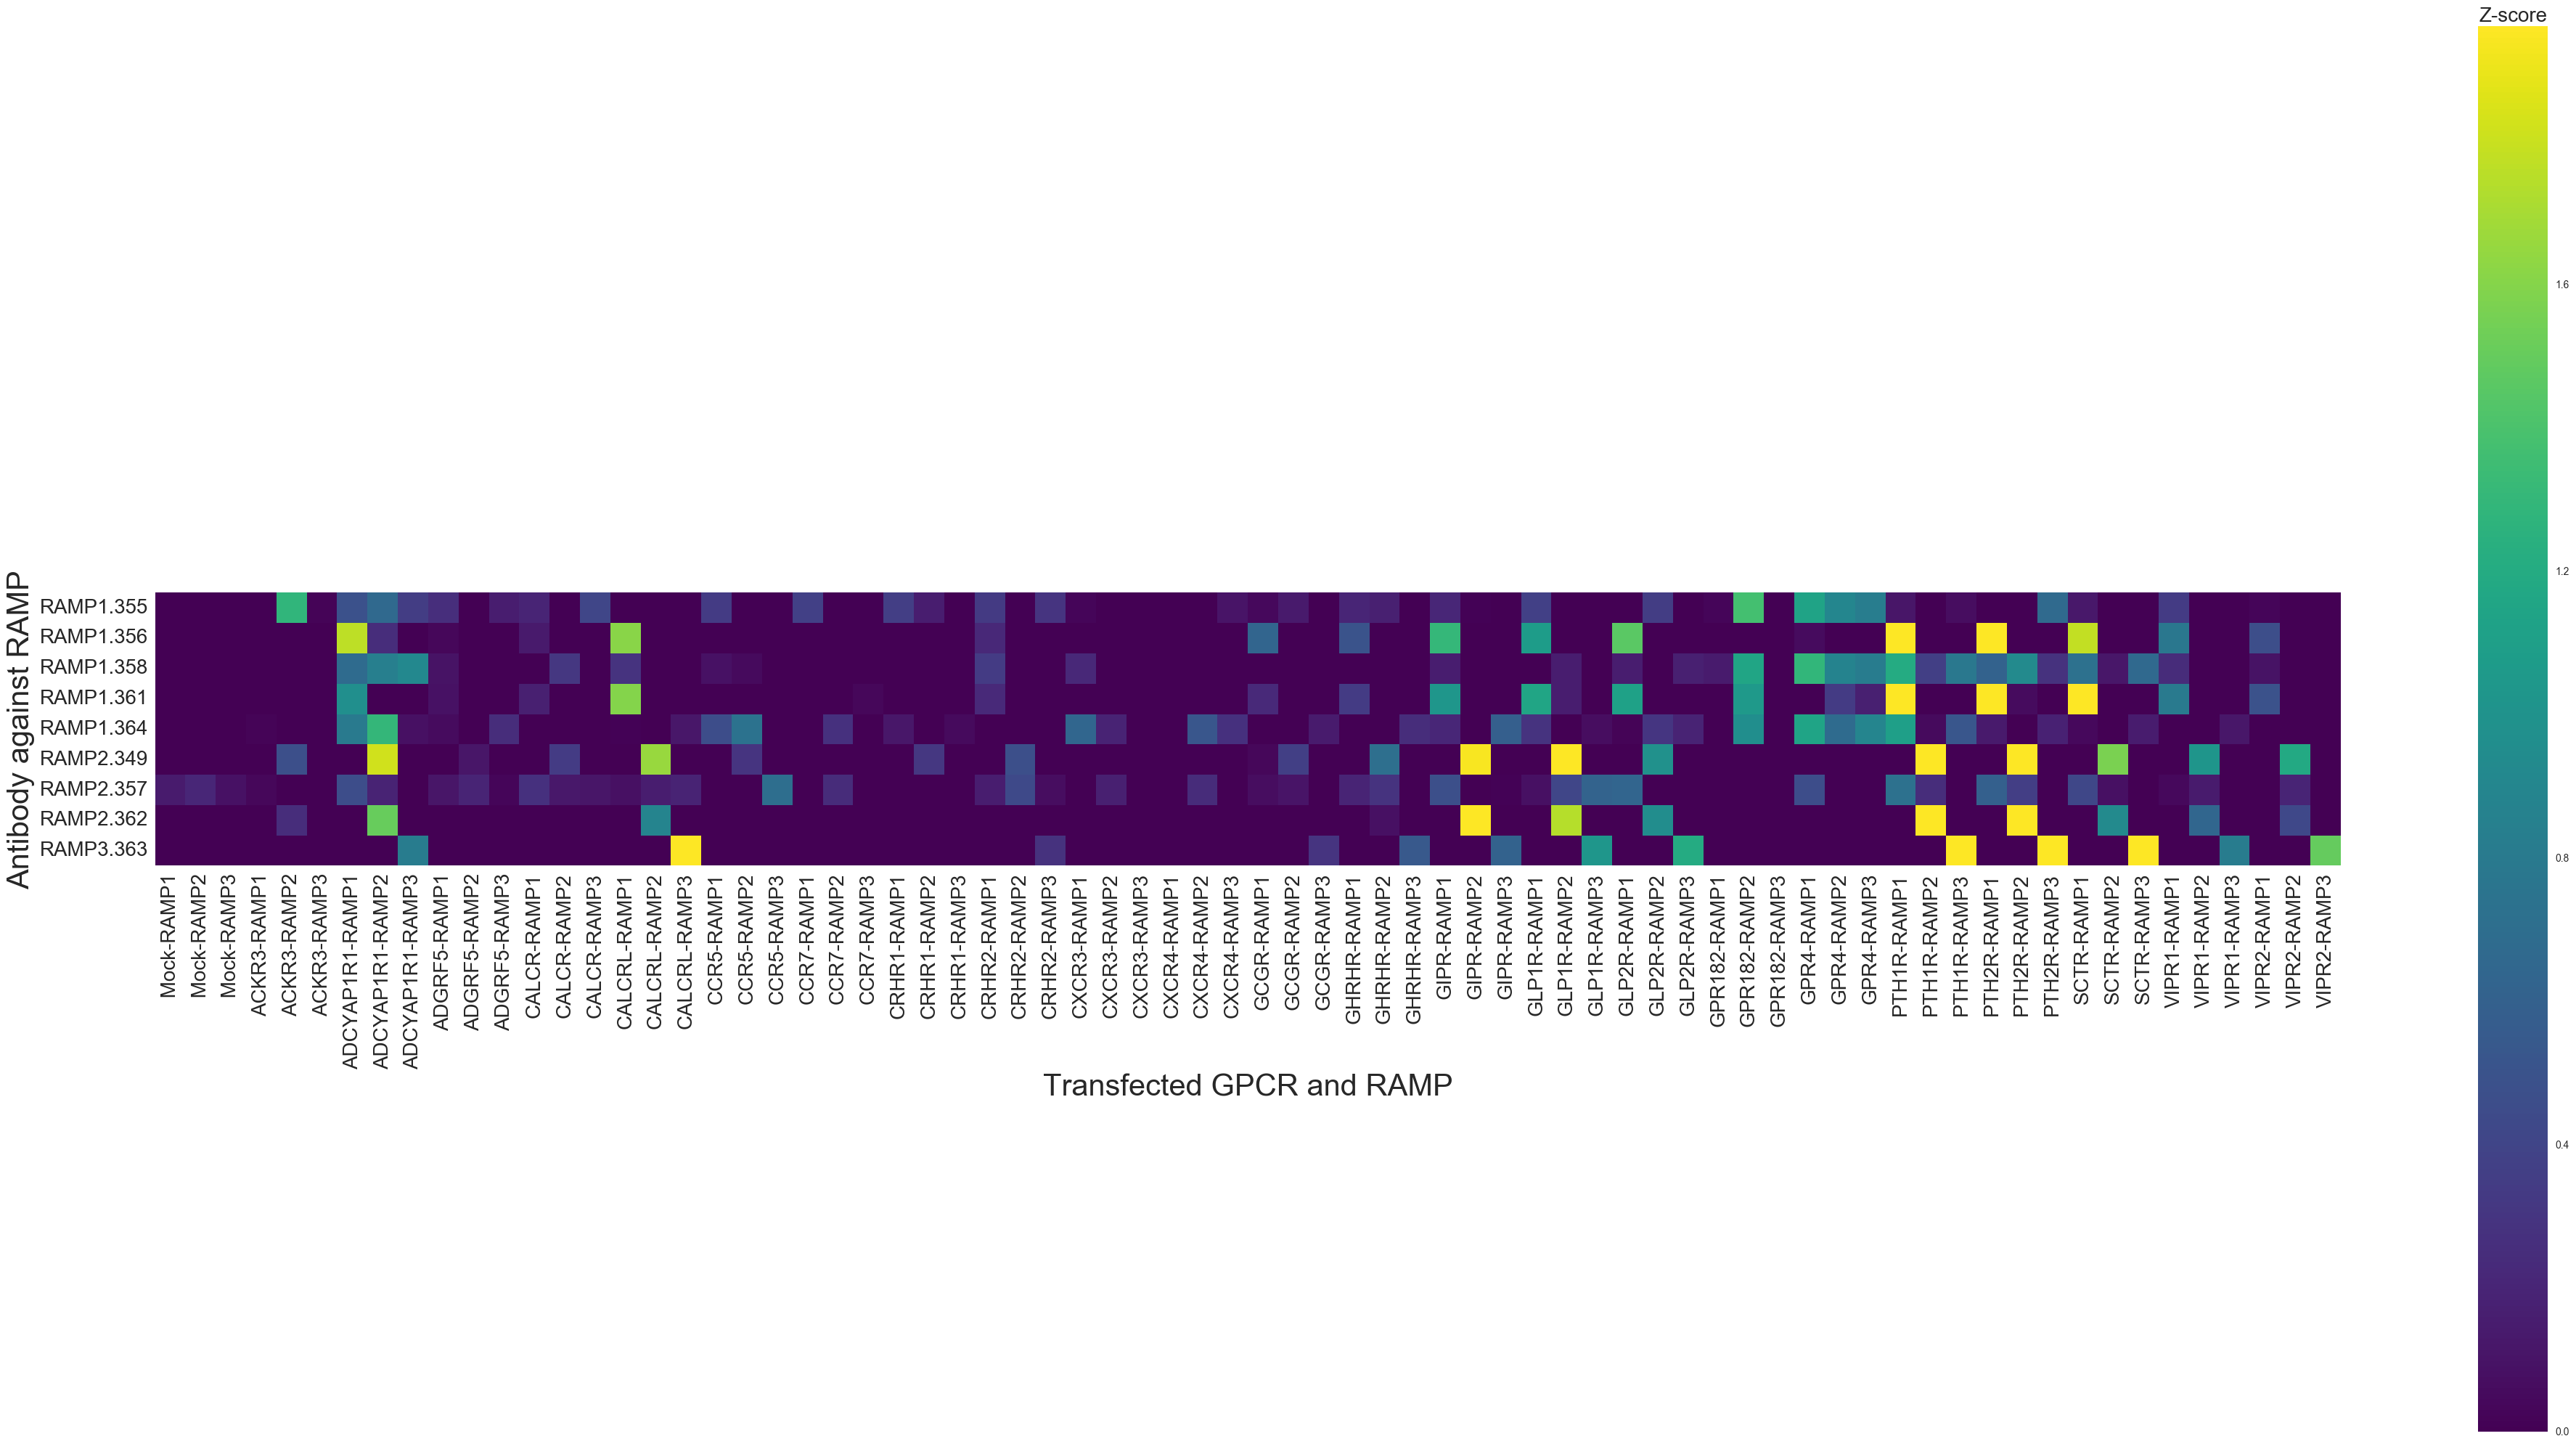

In [24]:
#RAMP interaction with GPCRs using RAMP Abs, and 1D4 detection
df_heatmap = pd.read_excel('/Users/emilylorenzen/desktop/TagPlay_Zscores.xlsx', sheetname="1D4", skiprows = 1)
#df_heatmap = pd.read_excel('/Users/emilylorenzen/desktop/TagPlay_Data2.xlsx', sheetname="1D4Z", skiprows = 508)
RAMP_list = df_heatmap['RAMP'].tolist()
df_heatmap.set_index(['RAMP', 'GPCR'], inplace=True)
cols = [col for col in df_heatmap.columns if col[:-3] in RAMP_list or col [:-4] in RAMP_list or col in RAMP_list]
df_heatmap = df_heatmap[cols]
df_heatmap.drop(' Mock', level = 'RAMP', inplace = True)
index = [ind for ind in df_heatmap.index]
df_heatmap_median = df_heatmap.groupby(level = ['GPCR', 'RAMP']).mean()

df_heatmap_median.sort_index(axis = 1, inplace = True)
#df_RAMP.drop(['ADCYAP1R1', 'CALCRL', 'CALCRL.1', 'CALCRL.2', 'VIPR1'], 1, inplace = True)
df_transpose = df_heatmap_median.transpose()
#print df_transpose
df_transpose.to_csv('Interaction by RAMP antibody 1D4 mean.csv')
fig, ax = plt.subplots(figsize=(40,20))  
ax = sns.heatmap(df_transpose.drop(['Buffer'], axis = 1), cmap="viridis", square=True, vmin = 0, vmax = 1.96)
sns.set(font_scale=1)
cbar = ax.collections[0].colorbar
cbar.ax.set_title('Z-score', fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.ylabel('Antibody against RAMP', fontsize = 30)
plt.xlabel('Transfected GPCR and RAMP', fontsize = 30)
plt.tight_layout()
plt.savefig('Interaction by RAMP antibody 1D4 mean.pdf', transparent = True)

GPCR         ACKR3               ADCYAP1R1              ADGRF5              \
RAMP         RAMP1  RAMP2  RAMP3     RAMP1 RAMP2  RAMP3  RAMP1 RAMP2 RAMP3   
ACKR3.75         0  1.125  0.625       NaN   NaN    NaN    NaN   NaN   NaN   
ACKR3.77         0  1.125  0.625       NaN   NaN    NaN    NaN   NaN   NaN   
ACKR3.89         0  1.125  0.625       NaN   NaN    NaN    NaN   NaN   NaN   
ADCYAP1R1.74     0  0.000  0.000       1.0  0.75  0.625    NaN   NaN   NaN   
ADCYAP1R1.88     0  0.000  0.000       1.0  0.75  0.625    NaN   NaN   NaN   

GPCR         CALCR  ...  PTH2R  SCTR             VIPR1             VIPR2  \
RAMP         RAMP1  ...  RAMP3 RAMP1 RAMP2 RAMP3 RAMP1 RAMP2 RAMP3 RAMP1   
ACKR3.75       NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
ACKR3.77       NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
ACKR3.89       NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
ADCYAP1R1.74   NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN 

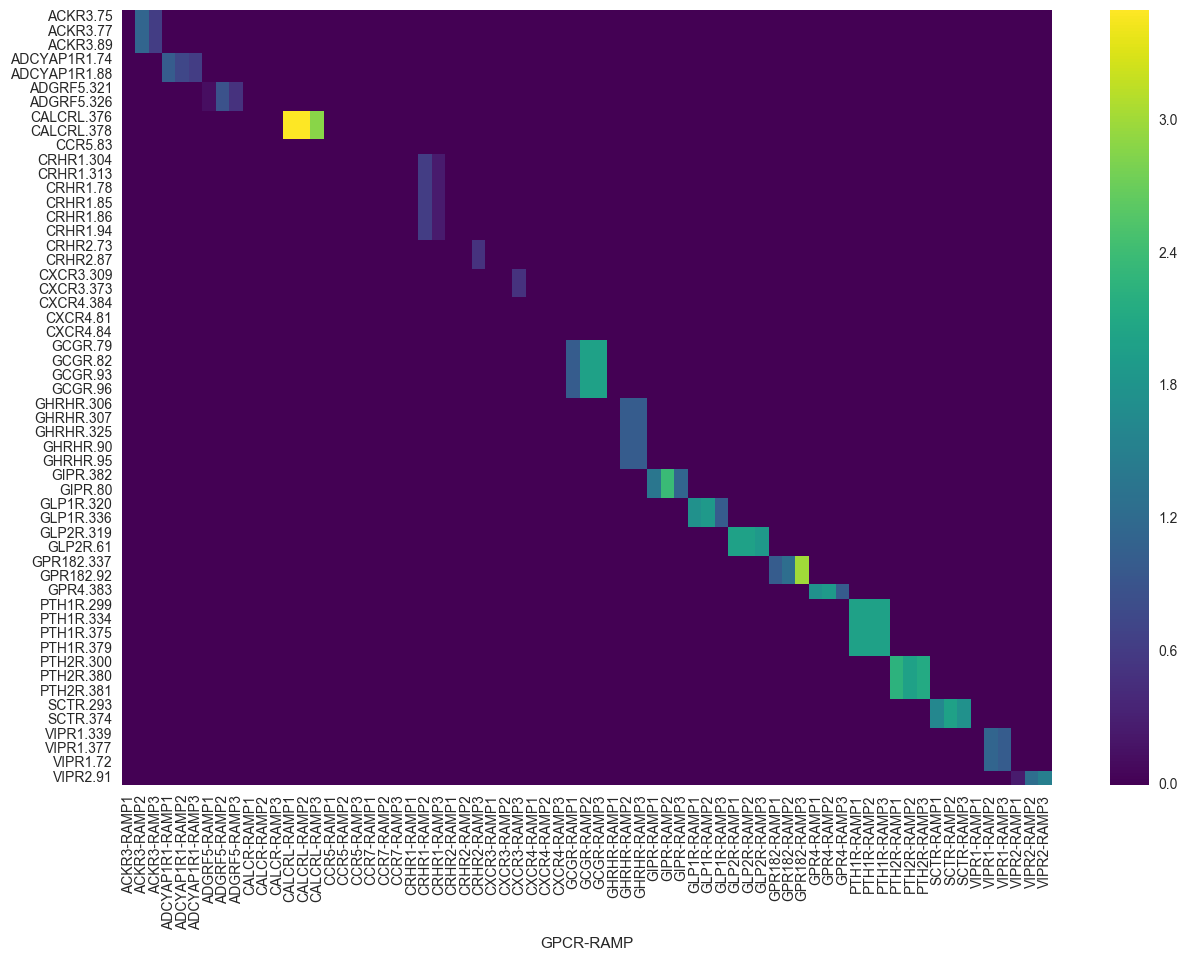

In [19]:
#heatmap of results from epitope tags using stars to combined significances. 
df1 = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df1")
print df1.head()
df1.fillna(0, inplace = True)
fig, ax = plt.subplots(figsize=(15,10)) 
ax = sns.heatmap(df1, vmin = 0, vmax = 3.5, cmap = 'viridis')

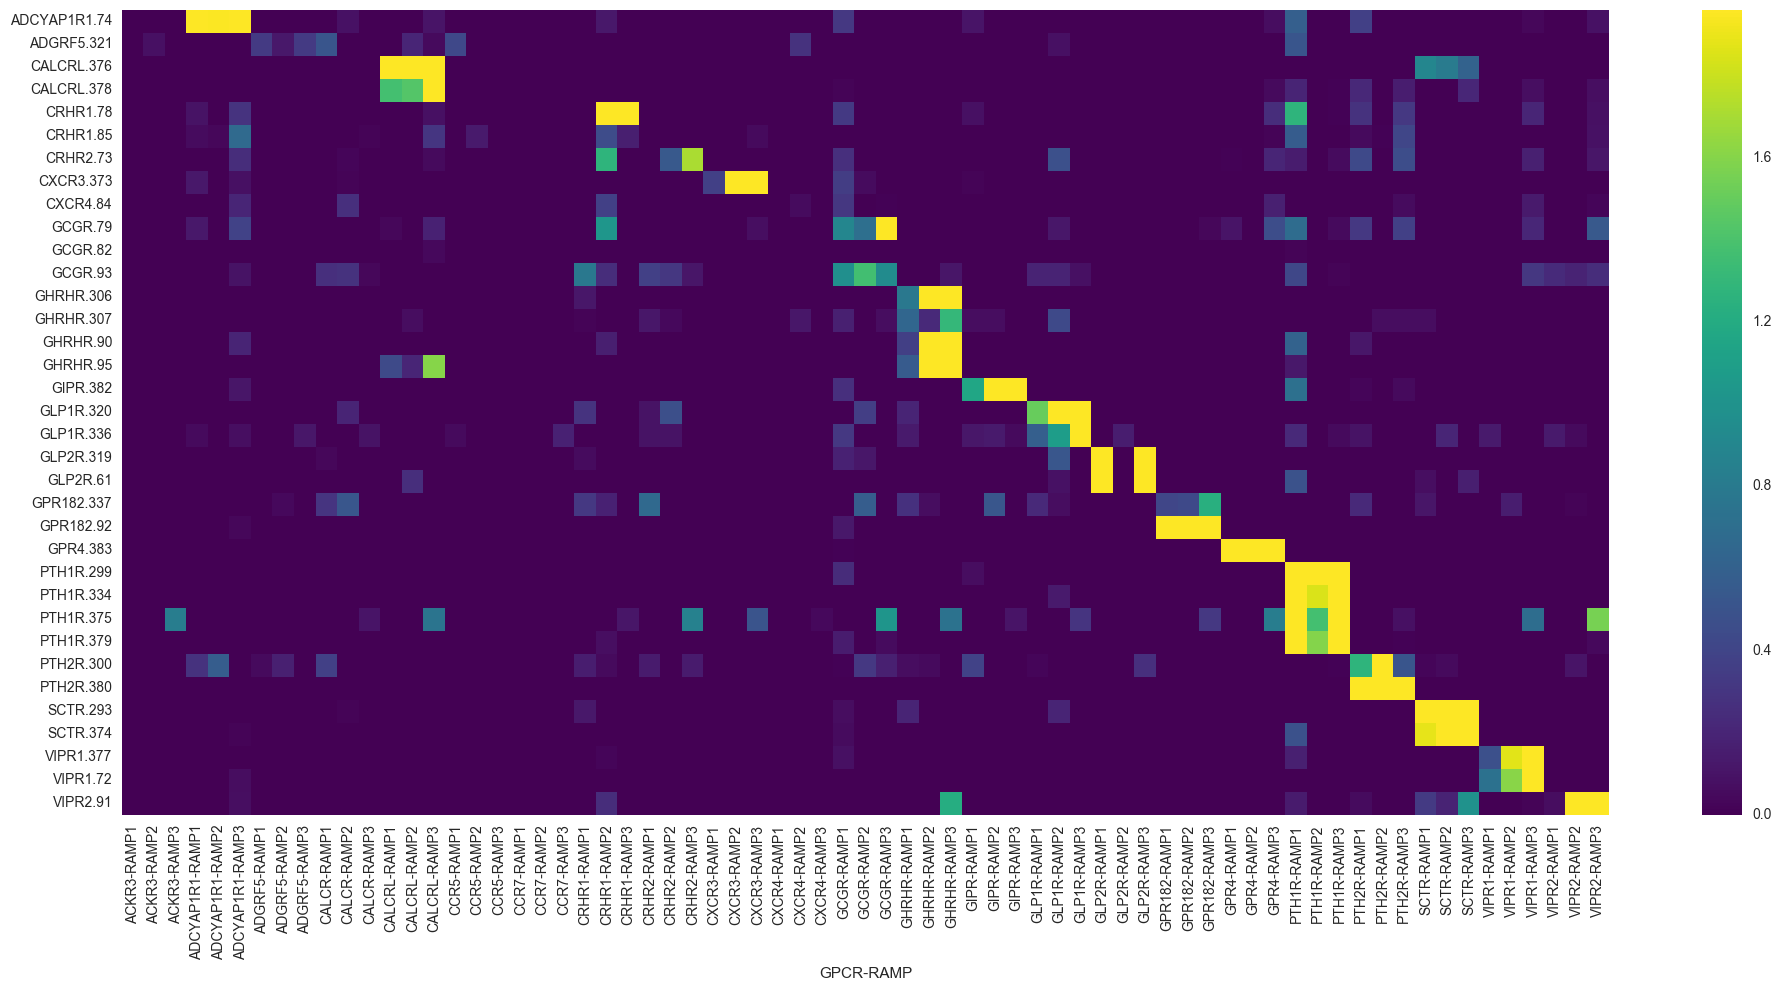

In [9]:
#heatmap of results from GPCR Abs using FLAG detection and zscore normalization, and found median of Z score (NaN not included in median calculation)
import seaborn as sns
RAMP_list= ['RAMP1', 'RAMP2', 'RAMP3']
df1 = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df3-1V")
#print df1.head()
df1.fillna(0, inplace = True)
fig, ax = plt.subplots(figsize=(20,10)) 
ax = sns.heatmap(df1, vmin = 0, vmax = 1.96, cmap = 'viridis')
plt.tight_layout()
plt.savefig('Interaction by GPCR antibody OLLAS mean.pdf', transparent = True)

In [5]:
print df1

GPCR         ACKR3              ADCYAP1R1               ADGRF5              \
RAMP         RAMP1  RAMP2 RAMP3     RAMP1  RAMP2  RAMP3  RAMP1 RAMP2 RAMP3   
ACKR3.75       0.0  1.125  0.75       NaN    NaN    NaN    NaN   NaN   NaN   
ACKR3.77       0.0  1.125  0.75       NaN    NaN    NaN    NaN   NaN   NaN   
ACKR3.89       0.0  1.125  0.75       NaN    NaN    NaN    NaN   NaN   NaN   
ADCYAP1R1.74   0.0  0.000  0.00      1.25  0.875  0.875    NaN   NaN   NaN   
ADCYAP1R1.88   0.0  0.000  0.00      1.25  0.875  0.875    NaN   NaN   NaN   
ADGRF5.321     0.0  0.000  0.00       NaN    NaN    NaN   0.25   1.0  0.75   
ADGRF5.326     0.0  0.000  0.00       NaN    NaN    NaN   0.25   1.0  0.75   
CALCRL.376     0.0  0.000  0.00       NaN    NaN    NaN    NaN   NaN   NaN   
CALCRL.378     0.0  0.000  0.00       NaN    NaN    NaN    NaN   NaN   NaN   
CCR5.83        0.0  0.000  0.00       NaN    NaN    NaN    NaN   NaN   NaN   
CRHR1.304      0.0  0.000  0.00       NaN    NaN    NaN    NaN  

In [1]:
#heatmap of results from GPCR Abs using OLLAS detection and zscore normalization 
import seaborn as sns
df1 = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df2-2")
#print df1.head()
df1.fillna(0, inplace = True)
fig, ax = plt.subplots(figsize=(20,10)) 
ax = sns.heatmap(df1, vmin = 0, vmax = 2, cmap = 'viridis')
plt.tight_layout()
plt.savefig('Interaction by GPCR antibody FLAG.pdf', transparent = True)

/Users/emilylorenzen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/emilylorenzen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


NameError: name 'pd' is not defined

('0: ', 0.0)
('1: ', 1.5810276679841897)
('0->1: ', 98.41897233201581)
('1->0: ', 0.0)
('0: ', 96.4163372859025)
('1: ', 1.370223978919631)
('0->1: ', 2.002635046113307)
('1->0: ', 0.21080368906455862)
('0: ', 96.46903820816864)
('1: ', 1.370223978919631)
('0->1: ', 1.9499341238471672)
('1->0: ', 0.21080368906455862)
('0: ', 96.65349143610014)
('1: ', 1.370223978919631)
('0->1: ', 1.7654808959156787)
('1->0: ', 0.21080368906455862)
('0: ', 96.65349143610014)
('1: ', 1.370223978919631)
('0->1: ', 1.7654808959156787)
('1->0: ', 0.21080368906455862)
('0: ', 96.78524374176548)
('1: ', 1.3438735177865613)
('0->1: ', 1.6337285902503293)
('1->0: ', 0.23715415019762848)
('0: ', 97.04874835309619)
('1: ', 1.3175230566534915)
('0->1: ', 1.370223978919631)
('1->0: ', 0.2635046113306983)
('0: ', 97.07509881422925)
('1: ', 1.2911725955204216)
('0->1: ', 1.3438735177865613)
('1->0: ', 0.2898550724637681)
('0: ', 97.12779973649539)
('1: ', 1.2911725955204216)
('0->1: ', 1.2911725955204216)
('1->0: ',

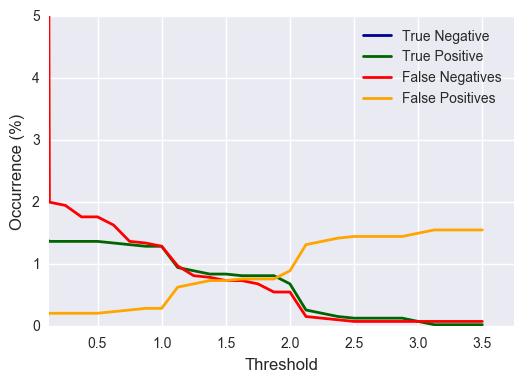

In [138]:
#comparison of excepted results with obtain results with FLAG Ab, vary the epitope results threshold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division


"""
1. Input two dataframes and change the values to 0 or 1 based on a threshold.
2. Compare the two dataframes and determine what % of data are 0 in both, what % are a 0 to 1 transition, % are 1 to 0 transition, and what % are 1 and 1 in both
3. Graph the percentages from task 2 vs. the threshold set in task 1, as a function of increasing threshold number.
Note: Did some cleaning of the data in the Excel file in order to compare both dataframes accurately - removed GCGR.289 on df1 and numbers outside of df
"""
THRESHOLD_START = 0.0
THRESHOLD_MAX = 3.625
THRESHOLD_STEP = 0.125

def process_df1(df):
    # apply threshold in increment of 0.125
    df_dict = {}
    df = df.fillna(0)
    for threshold in np.arange(THRESHOLD_START, THRESHOLD_MAX, THRESHOLD_STEP):
        t_df = apply_threshold(df.copy(), threshold)
        df_dict[threshold] = t_df
        t_df.to_csv("output/t_df1_{}.csv".format(threshold))
    return df_dict


def process_df2(df):
    # apply set threshold of 1.85
    return apply_threshold(df, 1.85)


def apply_threshold(df, threshold):
    df[df < threshold] = 0
    df[df >= threshold] = 1
    return df


def compare_dfs(df1, df2):
    # compare and get number of 0s occurring in both df for each entry
    diff0 = ((df2 == 0) & (df2 == df1))
    zero = (diff0[diff0 == True].count().sum() / 3795) * 100
    print("0: ", zero)

    # compare and get number of 1s occurring in both df for each entry
    diff1 = ((df2 == 1) & (df2 == df1))
    one = (diff1[diff1 == True].count().sum() / 3795) * 100
    print("1: ", one)

    # compare and get number of cells with 1 in df1 and 0 in df2
    diff0_1 = ((df1 == 1) & (df2 == 0))
    zero_to_one = (diff0_1[diff0_1 == True].count().sum() / 3795) * 100
    print("0->1: ", zero_to_one)

    # compare and get number of cells with 1 in df1 and 0 in df2
    diff1_0 = ((df1 == 0) & (df2 == 1))
    one_to_zero = (diff1_0[diff1_0 == True].count().sum() / 3795) * 100
    print("1->0: ", one_to_zero)

    return zero, one, zero_to_one, one_to_zero


def graph_percentage(df1, df2, t_df1_list, t_df2):
    thresholds = []
    zeros = []
    ones = []
    zero_to_ones = []
    one_to_zeros = []
    for threshold in np.arange(THRESHOLD_START, THRESHOLD_MAX, THRESHOLD_STEP):
        thresholds.append(threshold)
        zero, one, zero_to_one, one_to_zero = compare_dfs(t_df1_list[threshold], t_df2)
        zeros.append(zero)
        ones.append(one)
        zero_to_ones.append(zero_to_one)
        one_to_zeros.append(one_to_zero)
    
    %matplotlib inline

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Occurrence (%)", fontsize=12)
    ax.plot(thresholds, zeros, color='darkblue', linewidth=2, label="True Negative")
    ax.plot(thresholds, ones, color='darkgreen', linewidth=2, label="True Positive")
    ax.plot(thresholds, zero_to_ones, color='red', linewidth=2, label="False Negatives")
    ax.plot(thresholds, one_to_zeros, color='orange', linewidth=2, label="False Positives")
    ax.legend(loc='bottom right')
    ax.set_xlim(0.125, 3.75)
    ax.set_ylim(0, 5)
    plt.show()

df1 = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df1")
df2 = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df2")
t_df1_list = process_df1(df1)
t_df2 = process_df2(df2)
t_df2.to_csv("output/t_df2.csv")
graph_percentage(df1, df2, t_df1_list, t_df2)

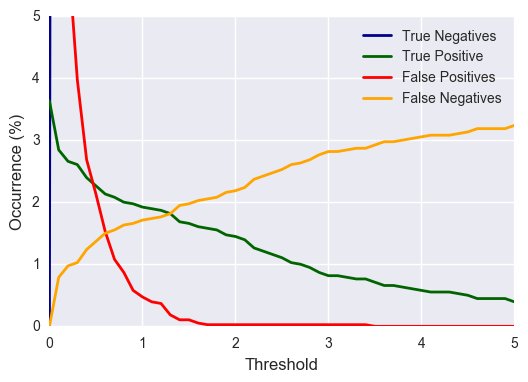

In [3]:
#comparison of excepted results with obtained results with FLAG Ab, vary the GPCR Ab results threshold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division


"""
1. Input two dataframes and change the values to 0 or 1 based on a threshold.
2. Compare the two dataframes and determine what % of data are 0 in both, what % are a 0 to 1 transition, % are 1 to 0 transition, and what % are 1 and 1 in both
3. Graph the percentages from task 2 vs. the threshold set in task 1, as a function of increasing threshold number.
Note: Did some cleaning of the data in the Excel file in order to compare both dataframes accurately - removed GCGR.289 on df1 and numbers outside of df
"""
THRESHOLD_START = 0.0
THRESHOLD_MAX = 10
THRESHOLD_STEP = 0.1

def process_df1(df):
    # apply threshold in increment of 0.125
    df_dict = {}
    df = df.fillna(0)
    for threshold in np.arange(THRESHOLD_START, THRESHOLD_MAX, THRESHOLD_STEP):
        t_df = apply_threshold(df.copy(), threshold)
        df_dict[threshold] = t_df
        t_df.to_csv("output/t_df1_{}.csv".format(threshold))
    return df_dict


def process_df2(df):
    # apply set threshold of 1.85
    df = df.fillna(0)
    return apply_threshold(df, 0.25)


def apply_threshold(df, threshold):
    df[df < threshold] = 0
    df[df >= threshold] = 1
    return df


def compare_dfs(df1, df2):
    # compare and get number of 0s occurring in both df for each entry
    diff0 = ((df1 == 0) & (df1 == df2)).stack()
    zero = (diff0[diff0 == True].count().sum() / 3795) * 100
    #print("0: ", zero)

    # compare and get number of 1s occurring in both df for each entry
    diff1 = ((df1 == 1) & (df1 == df2)).stack()
    one = (diff1[diff1 == True].count().sum() / 3795) * 100
    #print("1: ", one)

    # compare and get number of cells with 0 in df1 and 1 in df2
    diff0_1 = ((df2 == 0) & (df1 == 1)).stack()
    zero_to_one = (diff0_1[diff0_1 == True].count().sum() / 3795) * 100
    #print("0->1: ", zero_to_one)

    # compare and get number of cells with 1 in df1 and 0 in df2
    diff1_0 = ((df2 == 1) & (df1 == 0)).stack()
    one_to_zero = (diff1_0[diff1_0 == True].count().sum() / 3795) * 100
    #print("1->0: ", one_to_zero)

    return zero, one, zero_to_one, one_to_zero


def graph_percentage(df2, df1, t_df1_list, t_df2):
    thresholds = []
    zeros = []
    ones = []
    zero_to_ones = []
    one_to_zeros = []
    for threshold in np.arange(THRESHOLD_START, THRESHOLD_MAX, THRESHOLD_STEP):
        thresholds.append(threshold)
        zero, one, zero_to_one, one_to_zero = compare_dfs(t_df1_list[threshold], t_df2)
        zeros.append(zero)
        ones.append(one)
        zero_to_ones.append(zero_to_one)
        one_to_zeros.append(one_to_zero)
    
    %matplotlib inline

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Occurrence (%)", fontsize=12)
    ax.plot(thresholds, zeros, color='darkblue', linewidth=2, label="True Negatives")
    ax.plot(thresholds, ones, color='darkgreen', linewidth=2, label="True Positive")
    ax.plot(thresholds, zero_to_ones, color='red', linewidth=2, label="False Positives")
    ax.plot(thresholds, one_to_zeros, color='orange', linewidth=2, label="False Negatives")
    ax.legend(loc='bottom right')
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5.0)
    plt.show()
    plt.tight_layout()
    plt.savefig('Interaction by GPCR antibody FLAG.pdf', transparent = True)

df1 = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df1")
df2 = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df3-1")
t_df1_list = process_df1(df2)
t_df2 = process_df2(df1)
t_df2.to_csv("output/t_df2.csv")
graph_percentage(df1, df2, t_df1_list, t_df2)
#print df1

('0: ', 0.0)
('1: ', 1.4492753623188406)
('0->1: ', 0.0)
('1->0: ', 98.55072463768117)
('0: ', 96.52173913043478)
('1: ', 1.3438735177865613)
('0->1: ', 0.10540184453227931)
('1->0: ', 2.0289855072463765)
('0: ', 96.57444005270092)
('1: ', 1.3438735177865613)
('0->1: ', 0.10540184453227931)
('1->0: ', 1.9762845849802373)
('0: ', 96.73254281949934)
('1: ', 1.3175230566534915)
('0->1: ', 0.13175230566534915)
('1->0: ', 1.8181818181818181)
('0: ', 96.73254281949934)
('1: ', 1.3175230566534915)
('0->1: ', 0.13175230566534915)
('1->0: ', 1.8181818181818181)
('0: ', 96.86429512516469)
('1: ', 1.2911725955204216)
('0->1: ', 0.15810276679841898)
('1->0: ', 1.686429512516469)
('0: ', 97.10144927536231)
('1: ', 1.238471673254282)
('0->1: ', 0.21080368906455862)
('1->0: ', 1.4492753623188406)
('0: ', 97.15415019762847)
('1: ', 1.238471673254282)
('0->1: ', 0.21080368906455862)
('1->0: ', 1.396574440052701)
('0: ', 97.2068511198946)
('1: ', 1.238471673254282)
('0->1: ', 0.21080368906455862)
('1->0

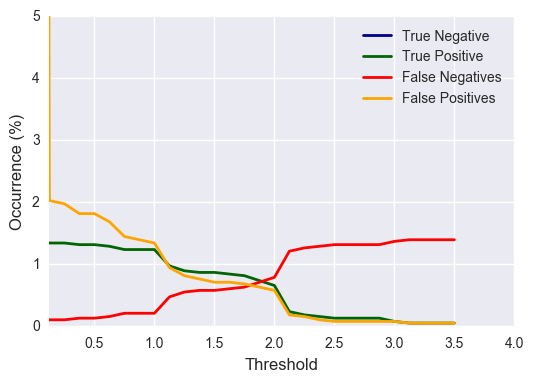

In [111]:
#comparison of excepted results with obtain results with OLLAS Ab, vary the epitope results threshold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division


"""
1. Input two dataframes and change the values to 0 or 1 based on a threshold.
2. Compare the two dataframes and determine what % of data are 0 in both, what % are a 0 to 1 transition, % are 1 to 0 transition, and what % are 1 and 1 in both
3. Graph the percentages from task 2 vs. the threshold set in task 1, as a function of increasing threshold number.
Note: Did some cleaning of the data in the Excel file in order to compare both dataframes accurately - removed GCGR.289 on df1 and numbers outside of df
"""
THRESHOLD_START = 0.0
THRESHOLD_MAX = 3.625
THRESHOLD_STEP = 0.125

def process_df1(df):
    # apply threshold in increment of 0.125
    df_dict = {}
    df = df.fillna(0)
    for threshold in np.arange(THRESHOLD_START, THRESHOLD_MAX, THRESHOLD_STEP):
        t_df = apply_threshold(df.copy(), threshold)
        df_dict[threshold] = t_df
        t_df.to_csv("output/t_df1_{}.csv".format(threshold))
    return df_dict


def process_df2(df):
    # apply set threshold of 1.85
    return apply_threshold(df, 2)


def apply_threshold(df, threshold):
    df[df < threshold] = 0
    df[df >= threshold] = 1
    return df


def compare_dfs(df1, df2):
    # compare and get number of 0s occurring in both df for each entry
    diff0 = ((df1 == 0) & (df1 == df2))
    zero = (diff0[diff0 == True].count().sum() / 3795) * 100
    print("0: ", zero)

    # compare and get number of 1s occurring in both df for each entry
    diff1 = ((df1 == 1) & (df1 == df2))
    one = (diff1[diff1 == True].count().sum() / 3795) * 100
    print("1: ", one)

    # compare and get number of cells with 0 in df1 and 1 in df2
    diff0_1 = ((df1 == 0) & (df2 == 1))
    zero_to_one = (diff0_1[diff0_1 == True].count().sum() / 3795) * 100
    print("0->1: ", zero_to_one)

    # compare and get number of cells with 1 in df1 and 0 in df2
    diff1_0 = ((df1 == 1) & (df2 == 0))
    one_to_zero = (diff1_0[diff1_0 == True].count().sum() / 3795) * 100
    print("1->0: ", one_to_zero)

    return zero, one, zero_to_one, one_to_zero


def graph_percentage(df1, df2, t_df1_list, t_df2):
    thresholds = []
    zeros = []
    ones = []
    zero_to_ones = []
    one_to_zeros = []
    for threshold in np.arange(THRESHOLD_START, THRESHOLD_MAX, THRESHOLD_STEP):
        thresholds.append(threshold)
        zero, one, zero_to_one, one_to_zero = compare_dfs(t_df1_list[threshold], t_df2)
        zeros.append(zero)
        ones.append(one)
        zero_to_ones.append(zero_to_one)
        one_to_zeros.append(one_to_zero)
    
    %matplotlib inline

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Occurrence (%)", fontsize=12)
    ax.plot(thresholds, zeros, color='darkblue', linewidth=2, label="True Negative")
    ax.plot(thresholds, ones, color='darkgreen', linewidth=2, label="True Positive")
    ax.plot(thresholds, zero_to_ones, color='red', linewidth=2, label="False Negatives")
    ax.plot(thresholds, one_to_zeros, color='orange', linewidth=2, label="False Positives")
    ax.legend(loc='bottom right')
    ax.set_xlim(0.125, 4.0)
    ax.set_ylim(0, 5.0)
    plt.show()

df1 = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df1")
df2 = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df3")
t_df1_list = process_df1(df1)
t_df2 = process_df2(df2)
t_df2.to_csv("output/t_df2.csv")
graph_percentage(df1, df2, t_df1_list, t_df2)

In [232]:
#comparison of excepted results with obtained results with OLLAS Ab, vary the GPCR Ab results threshold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division


"""
1. Input two dataframes and change the values to 0 or 1 based on a threshold.
2. Compare the two dataframes and determine what % of data are 0 in both, what % are a 0 to 1 transition, % are 1 to 0 transition, and what % are 1 and 1 in both
3. Graph the percentages from task 2 vs. the threshold set in task 1, as a function of increasing threshold number.
Note: Did some cleaning of the data in the Excel file in order to compare both dataframes accurately - removed GCGR.289 on df1 and numbers outside of df
"""
THRESHOLD_START = 0.0
THRESHOLD_MAX = 5
THRESHOLD_STEP = 0.1

def process_df1(df):
    # apply threshold in increment of 0.125
    df_dict = {}
    #df = df.fillna(0)
    for threshold in np.arange(THRESHOLD_START, THRESHOLD_MAX, THRESHOLD_STEP):
        t_df = apply_threshold(df.copy(), threshold)
        df_dict[threshold] = t_df
        t_df.to_csv("output/t_df1_{}.csv".format(threshold))
    return df_dict


def process_df2(df):
    # apply set threshold of 1.85
    df = df.fillna(0)
    return apply_threshold(df, 2)


def apply_threshold(df, threshold):
    df[df < threshold] = 0
    df[df >= threshold] = 1
    #print df
    return df


def compare_dfs(df1, df2):
    #print df1 
    #print df2.()
    #compare and get number of 0s occurring in both df for each entry
    diff0 = ((df2 == 0) & (df2 == df1))
    zero = (diff0[diff0 == True].count().sum() / 3795) * 100
    #print diff0
    #print("0: ", zero)

    #compare and get number of 1s occurring in both df for each entry
    diff1 = ((df2 == 1) & (df2 == df1))
    one = (diff1[diff1 == True].count().sum() / 3795) * 100
    #print("1: ", one)

    #compare and get number of cells with 0 in df1 and 1 in df2
    diff0_1 = ((df2 == 0) & (df1 == 1))
    zero_to_one = (diff0_1[diff0_1 == True].count().sum() / 3795) * 100
    #print("0->1: ", zero_to_one)

    #compare and get number of cells with 1 in df1 and 0 in df2
    diff1_0 = ((df2 == 1) & (df1 == 0))
    one_to_zero = (diff1_0[diff1_0 == True].count().sum() / 3795) * 100
    #print("1->0: ", one_to_zero)

    return zero, one, zero_to_one, one_to_zero


def graph_percentage(t_df1_list, t_df2):
    thresholds = []
    zeros = []
    ones = []
    zero_to_ones = []
    one_to_zeros = []
    for threshold in np.arange(THRESHOLD_START, THRESHOLD_MAX, THRESHOLD_STEP):
        thresholds.append(threshold)
        zero, one, zero_to_one, one_to_zero = compare_dfs(t_df1_list[threshold], t_df2)
        zeros.append(zero)
        ones.append(one)
        zero_to_ones.append(zero_to_one)
        one_to_zeros.append(one_to_zero)
    
    %matplotlib inline

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Occurrence (%)", fontsize=12)
    ax.plot(thresholds, zeros, color='darkblue', linewidth=2, label="True Negatives")
    ax.plot(thresholds, ones, color='darkgreen', linewidth=2, label="True Positive")
    ax.plot(thresholds, zero_to_ones, color='red', linewidth=2, label="False Positives")
    ax.plot(thresholds, one_to_zeros, color='orange', linewidth=2, label="False Negatives")
    ax.legend(loc='bottom right')
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5.0)
    plt.show()

df1 = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df1")
df2 = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df3-1V")
t_df1_list = process_df1(df2)
t_df2 = process_df2(df1)
t_df2.to_csv("output/t_df2.csv")
graph_percentage(t_df1_list, t_df2)

ValueError: Can only compare identically-labeled DataFrame objects

('0: ', 0.0)
('1: ', 10.144927536231885)
('0->1: ', 91.14331723027375)
('1->0: ', 0.0)
('0: ', 89.50617283950618)
('1: ', 1.7176596886741815)
('0->1: ', 1.6371443907675791)
('1->0: ', 8.427267847557703)
('0: ', 89.55984970477724)
('1: ', 1.7176596886741815)
('0->1: ', 1.5834675254965112)
('1->0: ', 8.427267847557703)
('0: ', 89.69404186795491)
('1: ', 1.6908212560386473)
('0->1: ', 1.4492753623188406)
('1->0: ', 8.454106280193237)
('0: ', 89.69404186795491)
('1: ', 1.6908212560386473)
('0->1: ', 1.4492753623188406)
('1->0: ', 8.454106280193237)
('0: ', 89.69404186795491)
('1: ', 1.6908212560386473)
('0->1: ', 1.4492753623188406)
('1->0: ', 8.454106280193237)
('0: ', 89.77455716586151)
('1: ', 1.610305958132045)
('0->1: ', 1.3687600644122384)
('1->0: ', 8.53462157809984)
('0: ', 89.96242619431025)
('1: ', 1.5029522275899088)
('0->1: ', 1.1808910359634999)
('1->0: ', 8.641975308641975)
('0: ', 89.98926462694578)
('1: ', 1.4761137949543746)
('0->1: ', 1.1540526033279657)
('1->0: ', 8.6688

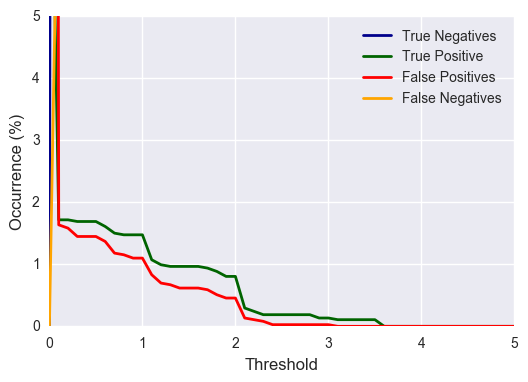

GPCR         ACKR3               ADCYAP1R1              ADGRF5               \
RAMP         RAMP1  RAMP2  RAMP3     RAMP1 RAMP2  RAMP3  RAMP1  RAMP2 RAMP3   
ACKR3.75       0.0  1.125  0.625       NaN   NaN    NaN    NaN    NaN   NaN   
ACKR3.77       0.0  1.125  0.625       NaN   NaN    NaN    NaN    NaN   NaN   
ACKR3.89       0.0  1.125  0.625       NaN   NaN    NaN    NaN    NaN   NaN   
ADCYAP1R1.74   0.0  0.000  0.000       1.0  0.75  0.625    NaN    NaN   NaN   
ADCYAP1R1.88   0.0  0.000  0.000       1.0  0.75  0.625    NaN    NaN   NaN   
ADGRF5.321     0.0  0.000  0.000       NaN   NaN    NaN  0.125  0.875   0.5   
ADGRF5.326     0.0  0.000  0.000       NaN   NaN    NaN  0.125  0.875   0.5   
CALCRL.376     0.0  0.000  0.000       NaN   NaN    NaN    NaN    NaN   NaN   
CALCRL.378     0.0  0.000  0.000       NaN   NaN    NaN    NaN    NaN   NaN   
CCR5.83        0.0  0.000  0.000       NaN   NaN    NaN    NaN    NaN   NaN   
CRHR1.304      0.0  0.000  0.000       NaN   NaN    

In [66]:
df = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df3")
threshold = 1.96
df[df < threshold] = 0
df[df >= threshold] = 1

print df

GPCR         ACKR3             ADCYAP1R1             ADGRF5             CALCR  \
RAMP         RAMP1 RAMP2 RAMP3     RAMP1 RAMP2 RAMP3  RAMP1 RAMP2 RAMP3 RAMP1   
ACKR3.75       0.0   0.0   0.0       0.0   0.0   0.0    0.0   0.0   0.0   0.0   
ACKR3.77       0.0   0.0   0.0       0.0   0.0   0.0    0.0   0.0   0.0   0.0   
ACKR3.89       0.0   0.0   0.0       0.0   0.0   0.0    0.0   0.0   0.0   0.0   
ADCYAP1R1.74   0.0   0.0   0.0       1.0   0.0   1.0    0.0   0.0   0.0   0.0   
ADCYAP1R1.88   0.0   0.0   0.0       0.0   0.0   0.0    0.0   0.0   0.0   0.0   
ADGRF5.321     0.0   0.0   0.0       0.0   0.0   0.0    0.0   0.0   0.0   0.0   
ADGRF5.326     0.0   0.0   0.0       0.0   0.0   0.0    0.0   0.0   0.0   0.0   
CALCRL.376     0.0   0.0   0.0       0.0   0.0   0.0    0.0   0.0   0.0   0.0   
CALCRL.378     0.0   0.0   0.0       0.0   0.0   0.0    0.0   0.0   0.0   0.0   
CCR5.83        0.0   0.0   0.0       0.0   0.0   0.0    0.0   0.0   0.0   0.0   
CRHR1.304      0.0   0.0   0

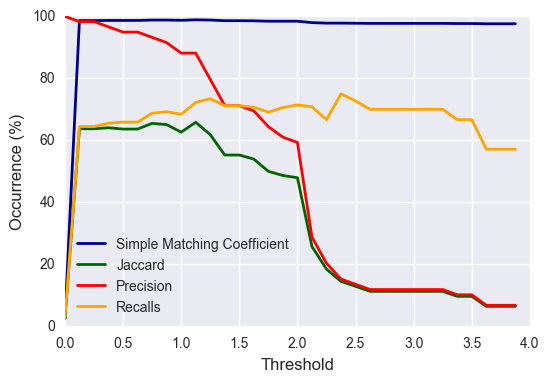

In [30]:
#Jaccard analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division


"""
1. Input two dataframes and change the values to 0 or 1 based on a threshold.
2. Compare the two dataframes and determine what % of data are 0 in both, what % are a 0 to 1 transition, % are 1 to 0 transition, and what % are 1 and 1 in both
3. Graph the percentages from task 2 vs. the threshold set in task 1, as a function of increasing threshold number.
Note: Did some cleaning of the data in the Excel file in order to compare both dataframes accurately - removed GCGR.289 on df1 and numbers outside of df
"""
THRESHOLD_START = 0.0
THRESHOLD_MAX = 4
THRESHOLD_STEP = 0.125

def process_df1(df):
    # apply threshold in increment of 0.125
    df_dict = {}
    df = df.fillna(0)
    for threshold in np.arange(THRESHOLD_START, THRESHOLD_MAX, THRESHOLD_STEP):
        t_df = apply_threshold(df.copy(), threshold)
        df_dict[threshold] = t_df
        t_df.to_csv("output/t_df1_{}.csv".format(threshold))
    return df_dict


def process_df2(df):
    # apply set threshold of 1.85
    df = df.fillna(0)
    return apply_threshold(df, 1.65)


def apply_threshold(df, threshold):
    df[df < threshold] = 0
    df[df >= threshold] = 1
    #print df
    return df


def compare_dfs(df1, df2):
    #print df1 
    #print df2.()
    #compare and get number of 0s occurring in both df for each entry
    diff0 = ((df1 == 0) & (df2 == df1))
    zero = (diff0[diff0 == True].count().sum())
    #print diff0
    #print("0: ", zero)

    #compare and get number of 1s occurring in both df for each entry
    diff1 = ((df1 == 1) & (df2 == df1))
    one = (diff1[diff1 == True].count().sum())
    #print("1: ", one)

    #compare and get number of cells with 0 in df1 and 1 in df2
    diff0_1 = ((df1 == 0) & (df2 == 1))
    zero_to_one = (diff0_1[diff0_1 == True].count().sum())
    #print("0->1: ", zero_to_one)

    #compare and get number of cells with 1 in df1 and 0 in df2
    diff1_0 = ((df1 == 1) & (df2 == 0))
    one_to_zero = (diff1_0[diff1_0 == True].count().sum())
    #print("1->0: ", one_to_zero)
    
    SMC = ((one + zero)/(one + zero + one_to_zero + zero_to_one)) * 100
    jaccard = (one/(one_to_zero + zero_to_one + one)) * 100
    precision = (one/(one + one_to_zero)) * 100
    recall = (one/(one + zero_to_one)) * 100
    #print Jaccard

    return SMC, jaccard, precision, recall

def graph_percentage(t_df1_list, t_df2):
    thresholds = []
    jaccards = []
    SMCs = []
    recalls = []
    precisions = []
    for threshold in np.arange(THRESHOLD_START, THRESHOLD_MAX, THRESHOLD_STEP):
        thresholds.append(threshold)
        SMC, jaccard, precision, recall = compare_dfs(t_df1_list[threshold], t_df2)
        SMCs.append(SMC)
        jaccards.append(jaccard)
        precisions.append(precision)
        recalls.append(recall)
        
    
    %matplotlib inline

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Occurrence (%)", fontsize=12)
    ax.plot(thresholds, SMCs, color='darkblue', linewidth=2, label="Simple Matching Coefficient")
    ax.plot(thresholds, jaccards, color='darkgreen', linewidth=2, label="Jaccard")
    ax.plot(thresholds, recalls, color='red', linewidth=2, label="Precision")
    ax.plot(thresholds, precisions, color='orange', linewidth=2, label="Recalls")
    ax.legend(loc='bottom right')
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 100)
    plt.show()

df1 = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df1V")
df2 = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df3-1V")
t_df1_list = process_df1(df1)
t_df2 = process_df2(df2)
t_df2.to_csv("output/t_df2.csv")
graph_percentage(t_df1_list, t_df2)

/Users/emilylorenzen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:63: RuntimeWarning: invalid value encountered in long_scalars


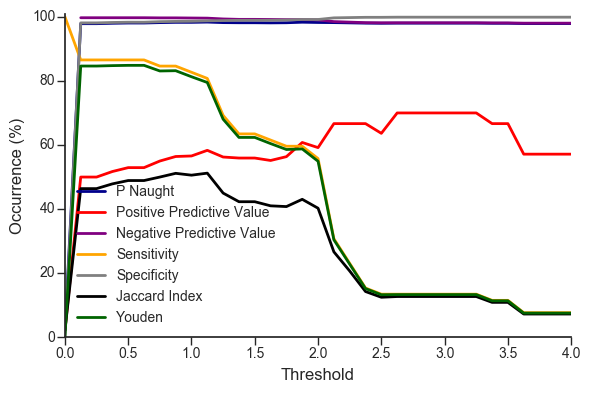

In [12]:
import seaborn as sns
sns.set_style('white')
"""
1. Input two dataframes and change the values to 0 or 1 based on a threshold.
2. Compare the two dataframes and determine what % of data are 0 in both, what % are a 0 to 1 transition, % are 1 to 0 transition, and what % are 1 and 1 in both
3. Graph the percentages from task 2 vs. the threshold set in task 1, as a function of increasing threshold number.
"""

THRESHOLD_START = 0.0
THRESHOLD_MAX = 4.1
THRESHOLD_STEP = 0.125

def process_df1(df):
    # apply threshold in increment of 0.125
    df_dict = {}
    df = df.fillna(0)
    for threshold in np.arange(THRESHOLD_START, THRESHOLD_MAX, THRESHOLD_STEP):
        t_df = apply_threshold(df.copy(), threshold)
        df_dict[threshold] = t_df
        t_df.to_csv("output/t_df1_{}.csv".format(threshold))
    return df_dict


def process_df2(df):
    # apply set threshold of 1.85
    df = df.fillna(0)
    return apply_threshold(df, 1.65)


def apply_threshold(df, threshold):
    df[df < threshold] = 0
    df[df >= threshold] = 1
    #print df
    return df


def compare_dfs(df1, df2):
    #print df1 
    #print df2.()
    #compare and get number of 0s occurring in both df for each entry
    diff0 = ((df1 == 0) & (df2 == df1))
    zero = (diff0[diff0 == True].count().sum())
    #print diff0
    #print("0: ", zero)

    #compare and get number of 1s occurring in both df for each entry
    diff1 = ((df1 == 1) & (df2 == df1))
    one = (diff1[diff1 == True].count().sum())
    #print("1: ", one)

    #compare and get number of cells with 0 in df1 and 1 in df2
    diff0_1 = ((df1 == 0) & (df2 == 1))
    zero_to_one = (diff0_1[diff0_1 == True].count().sum())
    #print("0->1: ", zero_to_one)

    #compare and get number of cells with 1 in df1 and 0 in df2
    diff1_0 = ((df1 == 1) & (df2 == 0))
    one_to_zero = (diff1_0[diff1_0 == True].count().sum())
    #print("1->0: ", one_to_zero)
    
    P = ((one + zero)/(one + zero + one_to_zero + zero_to_one)) * 100
    sensitivity = (one/(one_to_zero + one)) * 100
    specificity = (zero/(zero + zero_to_one)) * 100
    PPV = (one/(one + zero_to_one)) * 100
    NPV = (zero/(zero + one_to_zero)) * 100
    Jac = (one/(one + zero_to_one + one_to_zero)*100)
    Youden = ((one/(one + zero_to_one)) + (zero/(zero + one_to_zero)) - 1) * 100
    #print Jac

    return P, sensitivity, specificity, PPV, NPV, Jac, Youden

def graph_percentage(t_df1_list, t_df2):
    thresholds = []
    Ps = []
    sensitivities = []
    specicifities = []
    PPVs = []
    NPVs = []
    Jacs = []
    Youdens = []
    for threshold in np.arange(THRESHOLD_START, THRESHOLD_MAX, THRESHOLD_STEP):
        thresholds.append(threshold)
        P, sensitivity, specificity, PPV, NPV, Jac, Youden = compare_dfs(t_df1_list[threshold], t_df2)
        Ps.append(P)
        sensitivities.append(sensitivity)
        specicifities.append(specificity)
        PPVs.append(PPV)
        NPVs.append(NPV)
        Jacs.append(Jac)
        Youdens.append(Youden)
        #print threshold 
        #print Jac
        
    
    %matplotlib inline

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Occurrence (%)", fontsize=12)
    ax.plot(thresholds, Ps, color='darkblue', linewidth=2, label="P Naught")
    ax.plot(thresholds, sensitivities, color='red', linewidth=2, label="Positive Predictive Value")
    ax.plot(thresholds, specicifities, color='purple', linewidth=2, label="Negative Predictive Value")
    ax.plot(thresholds, PPVs, color='orange', linewidth=2, label="Sensitivity")
    ax.plot(thresholds, NPVs, color='grey', linewidth=2, label="Specificity")
    ax.plot(thresholds, Jacs, color = 'black', linewidth = 2, label = 'Jaccard Index')
    ax.plot(thresholds, Youdens, color = 'darkgreen', linewidth = 2, label = 'Youden')
    sns.despine()
    ax.tick_params(axis = 'both', direction = 'out', length = 6)
    ax.legend(loc='bottom right')
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 101)
    ax.grid(False)
    #plt.show()
    plt.tight_layout()
    plt.savefig('Data comparison FLAG Val.pdf')

df1 = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df1V")
df2 = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df2-1V")
t_df1_list = process_df1(df1)
t_df2 = process_df2(df2)
t_df2.to_csv("output/t_df2.csv")
graph_percentage(t_df1_list, t_df2)

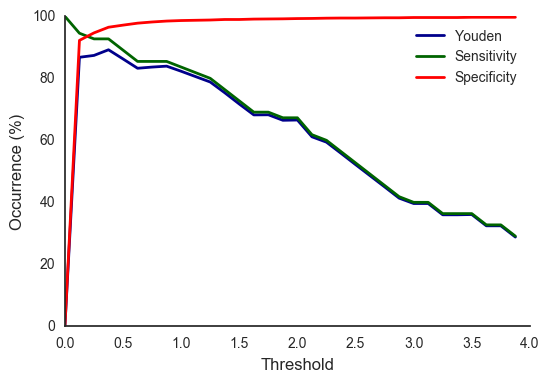

In [55]:
import seaborn as sns

"""
1. Input two dataframes and change the values to 0 or 1 based on a threshold.
2. Compare the two dataframes and determine what % of data are 0 in both, what % are a 0 to 1 transition, % are 1 to 0 transition, and what % are 1 and 1 in both
3. Graph the percentages from task 2 vs. the threshold set in task 1, as a function of increasing threshold number.
"""


THRESHOLD_START = 0
THRESHOLD_MAX = 4
THRESHOLD_STEP = 0.125

def process_df1(df):
    # apply threshold in increment of 0.125
    df_dict = {}
    df = df.fillna(0)
    for threshold in np.arange(THRESHOLD_START, THRESHOLD_MAX, THRESHOLD_STEP):
        t_df = apply_threshold(df.copy(), threshold)
        df_dict[threshold] = t_df
        t_df.to_csv("output/t_df1_{}.csv".format(threshold))
    return df_dict


def process_df2(df):
    # apply set threshold of 1.85
    df = df.fillna(0)
    return apply_threshold(df, 1.645)


def apply_threshold(df, threshold):
    df[df < threshold] = 0
    df[df >= threshold] = 1
    #print df
    return df


def compare_dfs(df1, df2):
    #print df1 
    #print df2.()
    #compare and get number of 0s occurring in both df for each entry
    diff0 = ((df1 == 0) & (df1 == df2))
    zero = (diff0[diff0 == True].count().sum())
    #print diff0
    #print("0: ", zero)

    #compare and get number of 1s occurring in both df for each entry
    diff1 = ((df1 == 1) & (df1 == df2))
    one = (diff1[diff1 == True].count().sum())
    #print("1: ", one)

    #compare and get number of cells with 0 in df1 and 1 in df2
    diff0_1 = ((df1 == 0) & (df2 == 1))
    zero_to_one = (diff0_1[diff0_1 == True].count().sum())
    #print("0->1: ", zero_to_one)

    #compare and get number of cells with 1 in df1 and 0 in df2
    diff1_0 = ((df1 == 1) & (df2 == 0))
    one_to_zero = (diff1_0[diff1_0 == True].count().sum())
    #print("1->0: ", one_to_zero)
    
    Youden = ((one/(one + zero_to_one)) + (zero/(zero + one_to_zero)) - 1) * 100
    sensitivity = (one/(one + zero_to_one)) * 100
    specificity = (zero/(zero + one_to_zero)) * 100
    #print Jaccard

    return Youden, sensitivity, specificity

def graph_percentage(t_df1_list, t_df2):
    thresholds = []
    Youdens = []
    sensitivities = []
    specificities = []
    for threshold in np.arange(THRESHOLD_START, THRESHOLD_MAX, THRESHOLD_STEP):
        thresholds.append(threshold)
        Youden, sensitivity, specificity = compare_dfs(t_df1_list[threshold], t_df2)
        Youdens.append(Youden)
        sensitivities.append(sensitivity)
        specificities.append(specificity)
    
    %matplotlib inline

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Occurrence (%)", fontsize=12)
    ax.plot(thresholds, Youdens, color='darkblue', linewidth=2, label="Youden")
    ax.plot(thresholds, sensitivities, color='darkgreen', linewidth=2, label="Sensitivity")
    ax.plot(thresholds, specificities, color='red', linewidth=2, label="Specificity")
    ax.legend(loc='bottom right')
    sns.despine()
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 100)
    plt.show()

df1 = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df1V")
df2 = pd.read_excel('dfs.xlsx', header=[0, 1], sheet_name="df3-1V")
t_df1_list = process_df1(df2)
t_df2 = process_df2(df1)
t_df2.to_csv("output/t_df2.csv")
graph_percentage(t_df1_list, t_df2)